## import 및 데이터 가져오기

In [1]:
from selenium import webdriver as wb
from selenium.webdriver.common.by import By
from selenium.webdriver.common.keys import Keys
from selenium.webdriver.support.ui import Select
import requests as req
import pandas as pd
from bs4 import BeautifulSoup as bs
import time
from wordcloud import WordCloud
from matplotlib import pyplot as plt
import numpy as np
import random
import matplotlib
from matplotlib import font_manager, rc
from matplotlib.patches import Patch
rc('font',family='malgun gothic')
matplotlib.rcParams['axes.unicode_minus'] = False
import os
from urllib.request import urlretrieve
import seaborn as sns
from datetime import datetime
import math
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense
from tensorflow import keras
import statsmodels.api as sm
import torch
import torch.nn as nn
import torch.optim as optim
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.preprocessing import PolynomialFeatures, LabelEncoder, MinMaxScaler, StandardScaler
from sklearn.linear_model import LinearRegression, Lasso, Ridge, ElasticNet
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score, classification_report, accuracy_score, precision_score, recall_score, f1_score, roc_curve, roc_auc_score, confusion_matrix
from sklearn.neighbors import KNeighborsClassifier
import graphviz
from sklearn.tree import export_graphviz, DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
import xgboost as xgb
import lightgbm as lgb
import warnings
warnings.filterwarnings('ignore')
from imblearn.over_sampling import SMOTE
from collections import Counter
import yaml
from IPython.core.magic import register_line_cell_magic
from IPython.display import Image, display
# 답 맞추는 데이터
data=pd.read_excel('./유통경진대회/1_데이터 모델링 부문_ 데이터 제공용/대형물류센터 소매점 판매 데이터.xlsx', sheet_name=1)
data=data.drop(['Unnamed: 9','Unnamed: 10'], axis=1)
data1=data[data.iloc[:,1]!="반품"]
# 강수량 데이터
rain=pd.read_excel('./유통경진대회/전국강수량.xlsx', sheet_name=0, index_col='날짜')
rain1=rain.drop('지점',axis=1)
rain1.index=pd.to_datetime(rain1.index)
rain2=rain1.resample(rule='1W')
rain3=rain2.mean()
# 기온 데이터
temp=pd.read_excel('./유통경진대회/21~22년 기온 데이터.xlsx', sheet_name=0, index_col="날짜")
temp10=temp[temp.index<pd.Timestamp(2022,7,4)]
temp10.index=pd.to_datetime(temp10.index)
resampled=temp10.resample(rule='1W')
temp1=resampled.mean()
temp.index=pd.to_datetime(temp.index)
resampled1=temp.resample(rule='1W')
temp2=resampled1.mean()
# 여행객 수 데이터
tra=pd.read_excel('./유통경진대회/월별_국내여행_횟수_20230814123849.xlsx', sheet_name=1, index_col='날짜')
# 제공 받은 데이터
pro=pd.read_excel('./유통경진대회/1_데이터 모델링 부문_ 데이터 제공용/상품정보_가공식품.xlsx', sheet_name=0, index_col='GTIN')
# 가격 데이터
waprice=pd.read_excel('./유통경진대회/2122년생수가격.xlsx', index_col='날짜')
cfprice=pd.read_excel('./유통경진대회/2122년커피가격.xlsx', index_col='날짜')
clprice=pd.read_excel('./유통경진대회/2122년콜라가격.xlsx', index_col='날짜')
raprice=pd.read_excel('./유통경진대회/2122년라면가격.xlsx', index_col='날짜')
for i in range(len(clprice.columns)):
    clprice.iloc[:,i]=clprice.iloc[:,i].str.split('/').str[0]
    clprice.iloc[:,i]=clprice.iloc[:,i].astype('int64')
for i in range(len(cfprice.columns)):
    cfprice.iloc[:,i]=cfprice.iloc[:,i].str.split('/').str[0]
    cfprice.iloc[:,i]=cfprice.iloc[:,i].replace(to_replace=r'[-]',value=0,regex=True)
    cfprice.iloc[:,i]=cfprice.iloc[:,i].astype('int64')
for i in range(len(waprice.columns)):
    waprice.iloc[:,i]=waprice.iloc[:,i].str.split('/').str[0]
    waprice.iloc[:,i]=waprice.iloc[:,i].astype('int64')
for i in range(len(raprice.columns)):
    raprice.iloc[:,i]=raprice.iloc[:,i].str.split('/').str[0]
    raprice.iloc[:,i]=raprice.iloc[:,i].astype('int64')
wa2L=waprice['삼다수(2L)']
wa2L.name='생수평균값'
coff=cfprice['레쓰비 마일드(175ml)']
coff.name='레쓰비가격'
cola=clprice['코카콜라(1.8L)']
cola.name='코카콜라'
ra5=raprice.mean(axis=1)
ra5.name='라면평균값'
# '물' 검색량 데이터(네이버, 구글)
wanase=pd.read_excel('./유통경진대회/datalab.xlsx')
wagose=pd.read_csv('./유통경진대회/multiTimeline.csv', encoding='cp949')
sanase=pd.read_excel('./유통경진대회/datalab.xlsx')
sagose=pd.read_csv('./유통경진대회/multiTimeline.csv', encoding='cp949')
wagosegr=wagose.groupby('날짜').sum()
wanasegr=wanase.groupby('날짜').sum()
wagosegr.index.name='판매일'
wanasegr.index.name='판매일'
wagosegr.index=pd.to_datetime(wagosegr.index)
rewagosegr=wagosegr.resample(rule='1W')
rerewagosegr=rewagosegr.sum()
wanasegr.index=pd.to_datetime(wanasegr.index)
rewanasegr=wanasegr.resample(rule='1W')
rerewanasegr=rewanasegr.sum()
# 여행객 데이터
travel=pd.read_excel('./유통경진대회/2122여행객월별.xlsx', index_col='기준연월')
travel.index.name='판매일'
travel=travel['방문자수']
# 코로나 확진자 데이터
covid=pd.read_excel('./유통경진대회/코로나확진자 21~22.xlsx')
covid1=covid.groupby('일자').sum()
covid1=covid1.drop(['해외','국내','사망'], axis=1)
covid1.index=pd.to_datetime(covid1.index)
recovid=covid1.resample(rule='1W')
rerecovid=recovid.sum()
rerecovid.index.name='판매일'
logcovid11=np.log(rerecovid)
comcovid=rerecovid[rerecovid.index<=datetime(2022, 7, 3)]
logcovid=np.log(comcovid)
# '삼다수' 검색량 데이터
samgo=pd.read_excel('./유통경진대회/samgo.xlsx')
samna=pd.read_excel('./유통경진대회/samna.xlsx')
samgogr=samgo.groupby('날짜').sum()
samnagr=samna.groupby('날짜').sum()
samgogr.index.name='판매일'
samnagr.index.name='판매일'
samgogr.index=pd.to_datetime(samgogr.index)
resamgogr=samgogr.resample(rule='1W')
reresamgogr=resamgogr.sum()
samnagr.index=pd.to_datetime(samnagr.index)
resamnagr=samnagr.resample(rule='1W')
reresamnagr=resamnagr.sum()
# '가야산천년수' 검색량 데이터
gana=pd.read_excel('./유통경진대회/가야산.xlsx')
ganagr=gana.groupby('날짜').sum()
ganagr.index.name='판매일'
ganagr.index=pd.to_datetime(ganagr.index)
reganagr=ganagr.resample(rule='1W')
rereganagr=reganagr.sum()
# '삼다수2L' 검색량 데이터
samdasu2L=pd.read_excel('./유통경진대회/samdasu2L.xlsx')
samdasu2Lgr=samdasu2L.groupby('날짜').sum()
samdasu2Lgr.index.name='판매일'
samdasu2Lgr.index=pd.to_datetime(samdasu2Lgr.index)
resamdasu2Lgr=samdasu2Lgr.resample(rule='1W')
reresamdasu2Lgr=resamdasu2Lgr.sum()
# '가야산2L' 검색량 데이터
gayasan=pd.read_excel('./유통경진대회/gayasan.xlsx')
gayasangr=gayasan.groupby('날짜').sum()
gayasangr.index.name='판매일'
gayasangr.index=pd.to_datetime(gayasangr.index)
regayasangr=gayasangr.resample(rule='1W')
reregayasangr=regayasangr.sum()
# 관광객 데이터
trav=pd.read_excel('./유통경진대회/관광객 수(통합)1.xlsx', index_col="기준년월")
trav=trav['방문자 수']
trav.index=pd.to_datetime(trav.index)
retrav=trav.resample(rule='1W')
reretrav=retrav.sum()
# 주어진 데이터의 라면 
a=pro[pro.iloc[:,1].str.contains('봉지라면')].index
b=a.to_list()
listdf=[]
for i in b:
    sam=data1[data1.iloc[:,7]==i]
    if sam.empty:
        continue
    sam2=sam.groupby('판매일').sum()
    sam2=sam2.drop(['입수','상품 바코드'], axis=1)
    sam2.index=pd.to_datetime(sam2.index)
    resampled=sam2.resample(rule='1W')
    resaa=resampled.sum()
    resaa.rename(columns={'판매수량':i}, inplace=True)
    listdf.append(resaa)
reramen=pd.concat(listdf,axis=1)
reramen.index=pd.to_datetime(reramen.index)
rereramen=reramen.resample(rule='1W')
rerereramen=rereramen.sum().sum(axis=1)
rerereramen.name="라면판매량"
# '삼다수' 가격 데이터
samweek=pd.read_excel("./wa2L.xlsx",sheet_name=1)
samweekgr=samweek.groupby('날짜').sum()
samweekgr.index.name='판매일'
samweekgr.index=pd.to_datetime(samweekgr.index)
resamweekgr=samweekgr.resample(rule='1W')
reresamweekgr=resamweekgr.sum()

## 가야산 천년수 데이터와 기온 데이터 plot 해보기

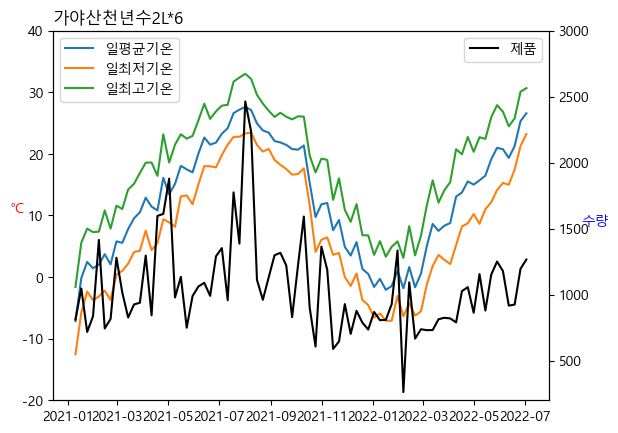

In [2]:
fig, ax1 = plt.subplots()
ax1.plot(temp1['평균기온(℃)'], label='일평균기온')
ax1.plot(temp1['최저기온(℃)'],label='일최저기온')
ax1.plot(temp1['최고기온(℃)'],label='일최고기온')
ax1.set_ylabel('℃', color = 'red', rotation = 0)
ax1.set_ylim(-20, 40)
ax1.legend()
ax2 = ax1.twinx()
sam=data1[data1.iloc[:,7]==8809274240219]
sam11=sam.groupby('판매일').sum()
sam11=sam11.drop(['입수','상품 바코드'], axis=1)
sam11.index=pd.to_datetime(sam11.index)
resampled=sam11.resample(rule='1W')
resa=resampled.sum()
ax2.plot(resa, label='제품', color='k')
ax2.set_ylabel('수량', color = 'blue', rotation = 0)
ax2.set_ylim(200, 3000)
plt.title('가야산천년수2L*6', loc='left')
plt.legend()
plt.show()

## 이상치 제거

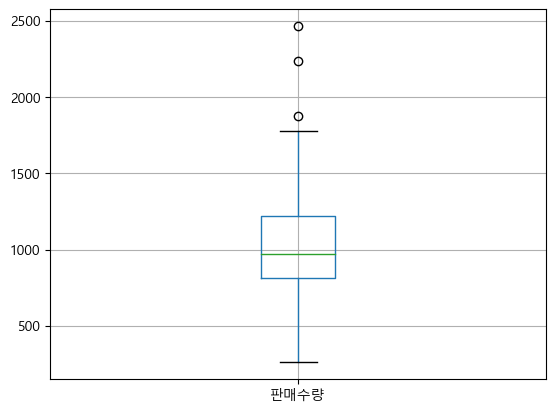

In [3]:
resa.boxplot('판매수량')
plt.show()

In [4]:
# 이상치는 2*표준편차 이상일 경우 경계값으로 변경
resa['판매수량'][resa['판매수량']>=resa['판매수량'].mean()+2*resa['판매수량'].std()]=resa['판매수량'].mean()+2*resa['판매수량'].std()
resa['판매수량'][resa['판매수량']<=resa['판매수량'].mean()-2*resa['판매수량'].std()]=resa['판매수량'].mean()-2*resa['판매수량'].std()

## 각 주어진 변수의 상관계수 구해보기

           판매수량       여행객      방문자수     생수평균값
판매수량   1.000000 -0.141157 -0.304210 -0.500070
여행객   -0.141157  1.000000  0.729920  0.411550
방문자수  -0.304210  0.729920  1.000000  0.403813
생수평균값 -0.500070  0.411550  0.403813  1.000000
         평균기온(℃)     판매수량
평균기온(℃)  1.00000  0.47562
판매수량     0.47562  1.00000


<function matplotlib.pyplot.show(close=None, block=None)>

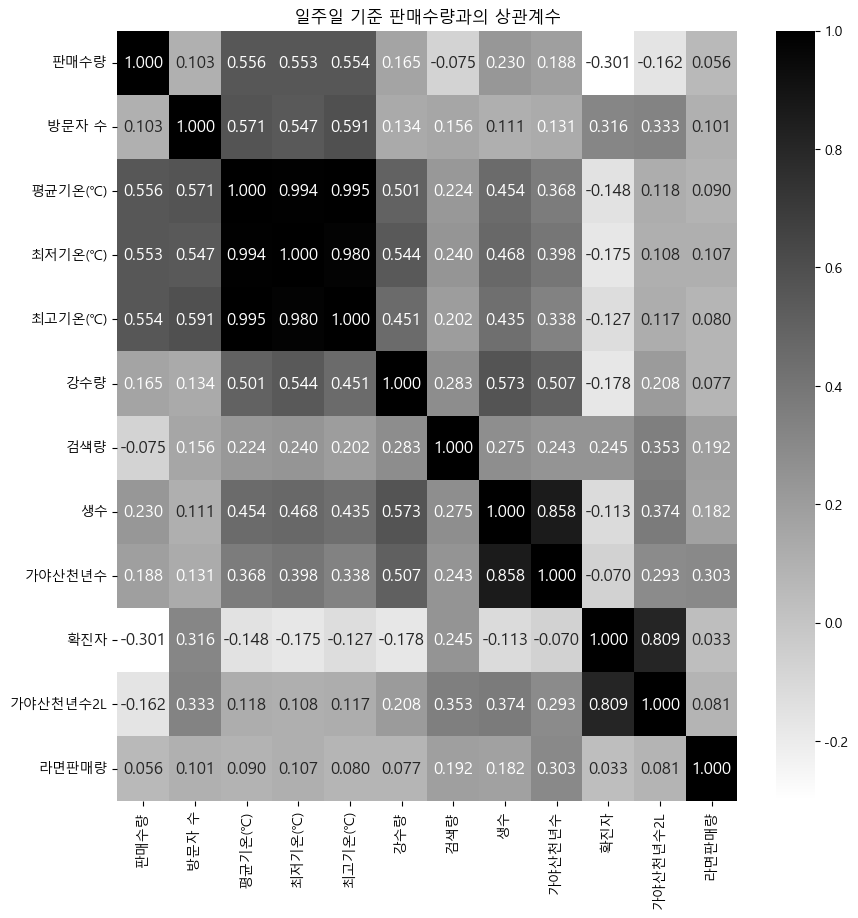

In [5]:
resampled1=sam11.resample(rule='1M')
resa1=resampled1.sum()
resa1=pd.concat([resa1,tra],axis=1)
resa1=pd.concat([resa1,travel],axis=1)
resa1=pd.concat([resa1,wa2L],axis=1)
print(resa1.corr())
atemp=temp1["평균기온(℃)"]
resash=resa.shift(-3)
atresh=pd.concat([atemp,resash],axis=1)
print(atresh.corr())
resa=pd.concat([resa,reretrav],axis=1)
resa=pd.concat([resa,temp1],axis=1)
resa=pd.concat([resa,rain3],axis=1)
resa=pd.concat([resa,rerewagosegr[rerewagosegr.index<=datetime(2022, 7, 3)]],axis=1)
resa=pd.concat([resa,rerewanasegr[rerewanasegr.index<=datetime(2022, 7, 3)]],axis=1)
resa=pd.concat([resa,rereganagr[rereganagr.index<=datetime(2022, 7, 3)]],axis=1)
resa=pd.concat([resa,logcovid],axis=1)
resa=pd.concat([resa,reregayasangr[reregayasangr.index<=datetime(2022, 7, 3)]],axis=1)
resa=pd.concat([resa,rerereramen],axis=1)
plt.figure(figsize=(10,10))
sns.heatmap(data=resa.corr(), annot=True, annot_kws={'size':12},fmt='.3f',cmap='binary')
plt.title('일주일 기준 판매수량과의 상관계수')
plt.show

## 데이터의 70%~ 80% 기준의 날짜 리스트 생성
- train데이터와 test데이터를 나누기 위해 70%~ 80%의 사이의 모든 날짜 데이터를 생성

In [ ]:
lili=[pd.Timestamp(2022,1,31),pd.Timestamp(2022,2,7),pd.Timestamp(2022,2,14),pd.Timestamp(2022,2,21),pd.Timestamp(2022,2,28),pd.Timestamp(2022,3,7),pd.Timestamp(2022,3,14)]

## 각 날짜에 따른 분석 시작
- 기온, 시계열 데이터를 사용
- 먼저 각 모델마다 기온데이터만을 변수로 사용한 예측
- 두 번째로 기온데이터+시계열 데이터를 변수로 사용한 예측

### 텐서플로우를 이용한 기온과 판매수량의 데이터 예측
- 기온데이터만 변수로 예측

In [ ]:
rmse1=[]
mae1=[]
r21=[]
evalu=[]
# 각 날짜마다 for문으로 예측을 돌림
for j in lili:
    resa=pd.concat([resa['판매수량'],temp2["평균기온(℃)"]],axis=1)
    resa.fillna(0,inplace=True)
    df = resa.reset_index(names="판매일")
    # 각 데이터를 분리시키기 위해서 날짜를 기준으로 나눈 데이터
    stdf = df[df['판매일']<j]
    nstdf=df[df['판매일']>=j]
    # 데이터의 간소화 최소값을 0, 최대값을 1로 주는 일반화를 시켜줌
    X2 = (stdf['평균기온(℃)']-stdf['평균기온(℃)'].min())/(stdf['평균기온(℃)'].max()-stdf['평균기온(℃)'].min())
    Y = (stdf['판매수량']-stdf['판매수량'].min())/(stdf['판매수량'].max()-stdf['판매수량'].min())
    # 모델 구성
    input1 = tf.keras.layers.Input(shape=(1,))
    output = tf.keras.layers.Dense(1)(input1)
    model = tf.keras.Model(inputs=input1, outputs=output)
    # 모델 컴파일
    model.compile(optimizer='adam', loss='mean_squared_error',metrics=['accuracy'])
    # 모델 학습
    model.fit(X2, Y, epochs=3000)
    # 새로운 입력값에 대한 예측
    new_X2 = (nstdf['평균기온(℃)']-nstdf['평균기온(℃)'].min())/(nstdf['평균기온(℃)'].max()-nstdf['평균기온(℃)'].min())
    prediction = model.predict(new_X2)
    # 데이터를 다시 원래 값으로 복원
    pre=(prediction)*(stdf['판매수량'].max()-stdf['판매수량'].min())+stdf['판매수량'].min()
    b=Y*(stdf['판매수량'].max()-stdf['판매수량'].min())+stdf['판매수량'].min()
    a=b.to_numpy()
    predi=np.append(a,pre)
    data2=pd.DataFrame(predi)
    data2.columns=['예측값']
    data2.index=df['판매일']
    predata=data2.reset_index()
    # 데이터 예측값 그래프화
    plt.plot(data2)
    plt.plot(resa[resa.index<=pd.Timestamp(2022,7,3)]['판매수량'])
    plt.show()
    # test에서 train의 차이값(과적합 유무 확인)
    evtrain=model.evaluate(X2,Y)
    evtest=model.evaluate(new_X2[nstdf[nstdf['판매일']<=pd.Timestamp(2022,7,3)]['평균기온(℃)'].index],((nstdf['판매수량']-nstdf['판매수량'].min())/(nstdf['판매수량'].max()-nstdf['판매수량'].min())).loc[:77])
    evalu.append(evtest[1]-evtrain[1])
    # 데이터 오차 구하기 rmse, mae, r2
    rmse = np.sqrt(mean_squared_error(df[(df['판매일']>=j)&(df['판매일']<=pd.Timestamp(2022,7,3))]['판매수량'], predata[(predata['판매일']>=j)&(predata['판매일']<=pd.Timestamp(2022,7,3))]['예측값']))
    print(rmse)
    mae=mean_absolute_error(df[(df['판매일']>=j)&(df['판매일']<=pd.Timestamp(2022,7,3))]['판매수량'], predata[(predata['판매일']>=j)&(predata['판매일']<=pd.Timestamp(2022,7,3))]['예측값'])
    print(mae)
    r2 = r2_score(df[(df['판매일']>=j)&(df['판매일']<=pd.Timestamp(2022,7,3))]['판매수량'], predata[(predata['판매일']>=j)&(predata['판매일']<=pd.Timestamp(2022,7,3))]['예측값'])
    print(r2)
    print(evtest[1]-evtrain[1])
    rmse1.append(rmse)
    mae1.append(mae)
    r21.append(r2)
print(rmse1)
print(mae1)
print(r21)
print(evalu)

### 오버피팅 및 오차 확인하기

In [ ]:
fig, ax1 = plt.subplots()
ax1.plot(lili,r21, label='r2',color='blue')
ax1.set_ylabel('r2 score', color = 'blue', rotation = 0)
ax1.axhline(0, color='lightblue', linestyle='-', linewidth=2)
ax2 = ax1.twinx()
ax2.plot(lili,evalu, label='test-train', color='red')
ax2.set_ylabel('accdif', color = 'red', rotation = 0)
ax2.axhline(0, color='lightcoral', linestyle='-', linewidth=2)
lines1, labels1 = ax1.get_legend_handles_labels()
lines2, labels2 = ax2.get_legend_handles_labels()
lines = lines1 + lines2
labels = labels1 + labels2
ax1.legend(lines, labels)
plt.title('', loc='left')
plt.show()

### 텐서플로우를 이용한 기온 & 판매일 과 판매수량의 데이터 예측
- 기온과 시계열을 변수로 이용한 예측

In [ ]:
rmse1=[]
mae1=[]
r21=[]
evalu=[]
for j in lili:
    resa=pd.concat([resa['판매수량'],temp2["평균기온(℃)"]],axis=1)
    resa.fillna(0,inplace=True)
    # 데이터의 간소화 최소값을 0, 최대값을 1로 주는 일반화를 시켜줌
    df = resa.reset_index(names="판매일")
    stdf = df[df['판매일']<j]
    nstdf=df[df['판매일']>=j]
    X2 = (stdf['평균기온(℃)']-stdf['평균기온(℃)'].min())/(stdf['평균기온(℃)'].max()-stdf['평균기온(℃)'].min())
    Y = (stdf['판매수량']-stdf['판매수량'].min())/(stdf['판매수량'].max()-stdf['판매수량'].min())
    X1 = ((stdf-stdf.min())/(stdf.max()-stdf.min()))['판매일']
    # 모델 구성
    input1 = tf.keras.layers.Input(shape=(1,))
    input2 = tf.keras.layers.Input(shape=(1,))
    concatenated_inputs = tf.keras.layers.Concatenate()([input1, input2])
    output = tf.keras.layers.Dense(1)(concatenated_inputs)
    model = tf.keras.Model(inputs=[input1, input2], outputs=output)
    # 모델 컴파일
    model.compile(optimizer='adam', loss='mean_squared_error',metrics=['accuracy'])
    # 모델 학습
    model.fit([X1, X2], Y, epochs=3000)
    # 새로운 입력값에 대한 예측
    new_X1 = ((nstdf-nstdf.min())/(nstdf.max()-nstdf.min()))['판매일']
    new_X2 = (nstdf['평균기온(℃)']-nstdf['평균기온(℃)'].min())/(nstdf['평균기온(℃)'].max()-nstdf['평균기온(℃)'].min())
    prediction = model.predict([new_X1,new_X2])
    # 데이터를 다시 원래 값으로 복원
    pre=(prediction)*(stdf['판매수량'].max()-stdf['판매수량'].min())+stdf['판매수량'].min()
    b=Y*(stdf['판매수량'].max()-stdf['판매수량'].min())+stdf['판매수량'].min()
    a=b.to_numpy()
    predi=np.append(a,pre)
    data2=pd.DataFrame(predi)
    data2.columns=['예측값']
    data2.index=df['판매일']
    predata=data2.reset_index()
    # 데이터 예측값 그래프화
    plt.plot(data2)
    plt.plot(resa[resa.index<=pd.Timestamp(2022,7,3)]['판매수량'])
    plt.show()
    # test에서 train의 차이값(과적합 유무 확인)
    evtrain=model.evaluate([X1,X2],Y)
    evtest=model.evaluate([new_X1[nstdf[nstdf['판매일']<=pd.Timestamp(2022,7,3)]['평균기온(℃)'].index],new_X2[nstdf[nstdf['판매일']<=pd.Timestamp(2022,7,3)]['평균기온(℃)'].index]],((nstdf['판매수량']-nstdf['판매수량'].min())/(nstdf['판매수량'].max()-nstdf['판매수량'].min())).loc[:77])
    evalu.append(evtest[1]-evtrain[1])
    # 데이터 오차 구하기 rmse, mae, r2
    rmse = np.sqrt(mean_squared_error(df[(df['판매일']>=j)&(df['판매일']<=pd.Timestamp(2022,7,3))]['판매수량'], predata[(predata['판매일']>=j)&(predata['판매일']<=pd.Timestamp(2022,7,3))]['예측값']))
    print(rmse)
    mae=mean_absolute_error(df[(df['판매일']>=j)&(df['판매일']<=pd.Timestamp(2022,7,3))]['판매수량'], predata[(predata['판매일']>=j)&(predata['판매일']<=pd.Timestamp(2022,7,3))]['예측값'])
    print(mae)
    r2 = r2_score(df[(df['판매일']>=j)&(df['판매일']<=pd.Timestamp(2022,7,3))]['판매수량'], predata[(predata['판매일']>=j)&(predata['판매일']<=pd.Timestamp(2022,7,3))]['예측값'])
    print(r2)
    print(evtest[1]-evtrain[1])
    rmse1.append(rmse)
    mae1.append(mae)
    r21.append(r2)
print(rmse1)
print(mae1)
print(r21)
print(evalu)

In [ ]:
fig, ax1 = plt.subplots()
ax1.plot(lili,r21, label='r2',color='blue')
ax1.set_ylabel('r2 score', color = 'blue', rotation = 0)
ax1.axhline(0, color='lightblue', linestyle='-', linewidth=2)
ax2 = ax1.twinx()
ax2.plot(lili,evalu, label='test-train', color='red')
ax2.set_ylabel('accdif', color = 'red', rotation = 0)
ax2.axhline(0, color='lightcoral', linestyle='-', linewidth=2)
lines1, labels1 = ax1.get_legend_handles_labels()
lines2, labels2 = ax2.get_legend_handles_labels()
lines = lines1 + lines2
labels = labels1 + labels2
ax1.legend(lines, labels)
plt.title('', loc='left')
plt.show()

### Scikit-learn으로 독립변수를 기온 한 가지로 비선형 회귀분석
- 선형인 1차부터 6차까지 비선형 회귀분석

In [ ]:
rmse1=[]
mae1=[]
r21=[]
evalu=[]
for j in lili:
    li1=[]
    li2=[]
    li3=[]
    li4=[]
    # 다항함수의 차수를 for문을 이용해서 6차 함수까지 돌려보기(차수를 올릴수록 오차율이 올라감)
    for i in range(1,7):
        resa=pd.concat([resa['판매수량'],temp2["평균기온(℃)"]],axis=1)
        resa.fillna(0,inplace=True)
        # 데이터의 간소화 최소값을 0, 최대값을 1로 주는 일반화를 시켜줌
        df = resa.reset_index(names="판매일")
        stdf = df[df['판매일']<j]
        nstdf=df[df['판매일']>=j]
        X2 = (stdf['평균기온(℃)']-stdf['평균기온(℃)'].min())/(stdf['평균기온(℃)'].max()-stdf['평균기온(℃)'].min())
        Y = (stdf['판매수량']-stdf['판매수량'].min())/(stdf['판매수량'].max()-stdf['판매수량'].min())
        # 다항 특성 추가
        poly = PolynomialFeatures(degree=i)
        X_train_poly = poly.fit_transform(X2.to_frame())

        # 다항 회귀 모델 생성
        model = LinearRegression()

        # 모델 학습
        model.fit(X_train_poly, Y)

        new_X2 = (nstdf['평균기온(℃)']-nstdf['평균기온(℃)'].min())/(nstdf['평균기온(℃)'].max()-nstdf['평균기온(℃)'].min())
        X_test_poly = poly.transform(new_X2.to_frame())
        prediction = model.predict(X_test_poly)
        
        pre=(prediction)*(stdf['판매수량'].max()-stdf['판매수량'].min())+stdf['판매수량'].min()
        b=Y*(stdf['판매수량'].max()-stdf['판매수량'].min())+stdf['판매수량'].min()
        a=b.to_numpy()
        predi=np.append(a,pre)
        data2=pd.DataFrame(predi)
        data2.columns=['예측값']
        data2.index=df['판매일']
        predata=data2.reset_index()
        # 데이터 예측값 그래프화
        plt.plot(data2)
        plt.plot(resa[resa.index<=pd.Timestamp(2022,7,3)]['판매수량'])
        plt.show()
        # test에서 train의 차이값(과적합 유무 확인)
        evtrain=model.score(X_train_poly,Y)
        evtest=model.score(X_test_poly[nstdf[nstdf['판매일']<=pd.Timestamp(2022,7,3)]['평균기온(℃)'].index-56],((nstdf['판매수량']-nstdf['판매수량'].min())/(nstdf['판매수량'].max()-nstdf['판매수량'].min())).loc[:77])
        # 데이터 오차 구하기 rmse, mae, r2
        rmse = np.sqrt(mean_squared_error(df[(df['판매일']>=j)&(df['판매일']<=pd.Timestamp(2022,7,3))]['판매수량'], predata[(predata['판매일']>=j)&(predata['판매일']<=pd.Timestamp(2022,7,3))]['예측값']))
        print(rmse)
        mae=mean_absolute_error(df[(df['판매일']>=j)&(df['판매일']<=pd.Timestamp(2022,7,3))]['판매수량'], predata[(predata['판매일']>=j)&(predata['판매일']<=pd.Timestamp(2022,7,3))]['예측값'])
        print(mae)
        r2 = r2_score(df[(df['판매일']>=j)&(df['판매일']<=pd.Timestamp(2022,7,3))]['판매수량'], predata[(predata['판매일']>=j)&(predata['판매일']<=pd.Timestamp(2022,7,3))]['예측값'])
        print(r2)
        print(evtest-evtrain)
        li1.append(rmse)
        li2.append(mae)
        li3.append(r2)
        li4.append(evtest-evtrain)
    rmse1.append(li1)
    mae1.append(li2)
    r21.append(li3)
    evalu.append(li4)
print(rmse1)
print(mae1)
print(r21)
print(evalu)

In [ ]:
for i in range(7):
    fig, ax1 = plt.subplots()
    ax1.plot(range(1,7),r21[i], label='r2',color='blue')
    ax1.set_ylabel('r2 score', color = 'blue', rotation = 0)
    ax1.axhline(0, color='lightblue', linestyle='-', linewidth=2)
    ax2 = ax1.twinx()
    ax2.plot(range(1,7),evalu[i], label='test-train', color='red')
    ax2.set_ylabel('accdif', color = 'red', rotation = 0)
    ax2.axhline(0, color='lightcoral', linestyle='-', linewidth=2)
    lines1, labels1 = ax1.get_legend_handles_labels()
    lines2, labels2 = ax2.get_legend_handles_labels()
    lines = lines1 + lines2
    labels = labels1 + labels2
    ax1.legend(lines, labels)
    plt.title(f'{lili[i]}', loc='left')
    plt.show()

### Scikit-learn으로 독립변수를 판매일과 기온 두 가지로 비선형 회귀분석

In [ ]:
# Scikit-learn으로 독립변수가 2개인 비선형 회귀분석
rmse1=[]
mae1=[]
r21=[]
evalu=[]
for j in lili:
    li1=[]
    li2=[]
    li3=[]
    li4=[]
    # 다항함수의 차수를 for문을 이용해서 6차 함수까지 돌려보기(차수를 올릴수록 오차율이 올라감)
    for i in range(1,7):
        resa=pd.concat([resa['판매수량'],temp2["평균기온(℃)"]],axis=1)
        resa.fillna(0,inplace=True)
        # 데이터의 간소화 최소값을 0, 최대값을 1로 주는 일반화를 시켜줌
        df = resa.reset_index(names="판매일")
        stdf = df[df['판매일']<j]
        nstdf=df[df['판매일']>=j]
        X1 = ((stdf-stdf.min())/(stdf.max()-stdf.min()))['판매일']
        X2 = (stdf['평균기온(℃)']-stdf['평균기온(℃)'].min())/(stdf['평균기온(℃)'].max()-stdf['평균기온(℃)'].min())
        Y = (stdf['판매수량']-stdf['판매수량'].min())/(stdf['판매수량'].max()-stdf['판매수량'].min())
        X_train=pd.concat([X1,X2],axis=1)
        # 다항 특성 추가
        poly = PolynomialFeatures(degree=i)
        X_train_poly = poly.fit_transform(X_train)

        # 다항 회귀 모델 생성
        model = LinearRegression()

        # 모델 학습
        model.fit(X_train_poly, Y)

        new_X1 = ((nstdf-nstdf.min())/(nstdf.max()-nstdf.min()))['판매일']
        new_X2 = (nstdf['평균기온(℃)']-nstdf['평균기온(℃)'].min())/(nstdf['평균기온(℃)'].max()-nstdf['평균기온(℃)'].min())
        X_test=pd.concat([new_X1,new_X2],axis=1)
        X_test_poly = poly.transform(X_test)
        prediction = model.predict(X_test_poly)
        
        pre=(prediction)*(stdf['판매수량'].max()-stdf['판매수량'].min())+stdf['판매수량'].min()
        b=Y*(stdf['판매수량'].max()-stdf['판매수량'].min())+stdf['판매수량'].min()
        a=b.to_numpy()
        predi=np.append(a,pre)
        data2=pd.DataFrame(predi)
        data2.columns=['예측값']
        data2.index=df['판매일']
        predata=data2.reset_index()
        # 데이터 예측값 그래프화
        plt.plot(data2)
        plt.plot(resa[resa.index<=pd.Timestamp(2022,7,3)]['판매수량'])
        plt.show()
        # test에서 train의 차이값(과적합 유무 확인)
        evtrain=model.score(X_train_poly,Y)
        evtest=model.score(X_test_poly[nstdf[nstdf['판매일']<=pd.Timestamp(2022,7,3)]['평균기온(℃)'].index-56],((nstdf['판매수량']-nstdf['판매수량'].min())/(nstdf['판매수량'].max()-nstdf['판매수량'].min())).loc[:77])
        # 데이터 오차 구하기 rmse, mae, r2
        rmse = np.sqrt(mean_squared_error(df[(df['판매일']>=j)&(df['판매일']<=pd.Timestamp(2022,7,3))]['판매수량'], predata[(predata['판매일']>=j)&(predata['판매일']<=pd.Timestamp(2022,7,3))]['예측값']))
        print(rmse)
        mae=mean_absolute_error(df[(df['판매일']>=j)&(df['판매일']<=pd.Timestamp(2022,7,3))]['판매수량'], predata[(predata['판매일']>=j)&(predata['판매일']<=pd.Timestamp(2022,7,3))]['예측값'])
        print(mae)
        r2 = r2_score(df[(df['판매일']>=j)&(df['판매일']<=pd.Timestamp(2022,7,3))]['판매수량'], predata[(predata['판매일']>=j)&(predata['판매일']<=pd.Timestamp(2022,7,3))]['예측값'])
        print(r2)
        print(evtest-evtrain)
        li1.append(rmse)
        li2.append(mae)
        li3.append(r2)
        li4.append(evtest-evtrain)
    rmse1.append(li1)
    mae1.append(li2)
    r21.append(li3)
    evalu.append(li4)
print(rmse1)
print(mae1)
print(r21)
print(evalu)

In [ ]:
for i in range(7):
    fig, ax1 = plt.subplots()
    ax1.plot(range(1,7),r21[i], label='r2',color='blue')
    ax1.set_ylabel('r2 score', color = 'blue', rotation = 0)
    ax1.axhline(0, color='lightblue', linestyle='-', linewidth=2)
    ax2 = ax1.twinx()
    ax2.plot(range(1,7),evalu[i], label='test-train', color='red')
    ax2.set_ylabel('accdif', color = 'red', rotation = 0)
    ax2.axhline(0, color='lightcoral', linestyle='-', linewidth=2)
    lines1, labels1 = ax1.get_legend_handles_labels()
    lines2, labels2 = ax2.get_legend_handles_labels()
    lines = lines1 + lines2
    labels = labels1 + labels2
    ax1.legend(lines, labels)
    plt.title(f'{lili[i]}', loc='left')
    plt.show()

### 독립변수를 기온 한 가지로 xgb 회귀분석
- 하이퍼 파라미터의 변화를 위해 1부터 100까지 n_estimators를 변경

In [ ]:
rmse2=[]
mae2=[]
r22=[]
evalu2=[]
for i in range(1,101):
    rmse1=[]
    mae1=[]
    r21=[]
    evalu=[]
    for j in lili:
        resa=pd.concat([resa['판매수량'],temp2["평균기온(℃)"]],axis=1)
        resa.fillna(0,inplace=True)
        # 데이터의 간소화 최소값을 0, 최대값을 1로 주는 일반화를 시켜줌
        df = resa.reset_index(names="판매일")
        stdf = df[df['판매일']<j]
        nstdf=df[df['판매일']>=j]
        X2 = (stdf['평균기온(℃)']-stdf['평균기온(℃)'].min())/(stdf['평균기온(℃)'].max()-stdf['평균기온(℃)'].min())
        Y = (stdf['판매수량']-stdf['판매수량'].min())/(stdf['판매수량'].max()-stdf['판매수량'].min())
        # 다항 회귀 모델 생성
        model = xgb.XGBRegressor(objective='reg:squarederror', n_estimators=i, random_state=42)

        # 모델 학습
        model.fit(X2, Y)

        new_X2 = (nstdf['평균기온(℃)']-nstdf['평균기온(℃)'].min())/(nstdf['평균기온(℃)'].max()-nstdf['평균기온(℃)'].min())
        prediction = model.predict(new_X2)

        pre=(prediction)*(stdf['판매수량'].max()-stdf['판매수량'].min())+stdf['판매수량'].min()
        b=Y*(stdf['판매수량'].max()-stdf['판매수량'].min())+stdf['판매수량'].min()
        a=b.to_numpy()
        predi=np.append(a,pre)
        data2=pd.DataFrame(predi)
        data2.columns=['예측값']
        data2.index=df['판매일']
        predata=data2.reset_index()
        # 데이터 예측값 그래프화
        plt.plot(data2)
        plt.plot(resa[resa.index<=pd.Timestamp(2022,7,3)]['판매수량'])
        plt.show()
        evtrain=model.score(X2,Y)
        evtest=model.score(new_X2[nstdf[nstdf['판매일']<=pd.Timestamp(2022,7,3)]['평균기온(℃)'].index],((nstdf['판매수량']-nstdf['판매수량'].min())/(nstdf['판매수량'].max()-nstdf['판매수량'].min())).loc[:77])
        rmse = np.sqrt(mean_squared_error(df[(df['판매일']>=j)&(df['판매일']<=pd.Timestamp(2022,7,3))]['판매수량'], predata[(predata['판매일']>=j)&(predata['판매일']<=pd.Timestamp(2022,7,3))]['예측값']))
        print(rmse)
        mae=mean_absolute_error(df[(df['판매일']>=j)&(df['판매일']<=pd.Timestamp(2022,7,3))]['판매수량'], predata[(predata['판매일']>=j)&(predata['판매일']<=pd.Timestamp(2022,7,3))]['예측값'])
        print(mae)
        r2 = r2_score(df[(df['판매일']>=j)&(df['판매일']<=pd.Timestamp(2022,7,3))]['판매수량'], predata[(predata['판매일']>=j)&(predata['판매일']<=pd.Timestamp(2022,7,3))]['예측값'])
        print(r2)
        print(evtest-evtrain)
        rmse1.append(rmse)
        mae1.append(mae)
        r21.append(r2)
        evalu.append(evtest-evtrain)
    print(rmse1)
    print(mae1)
    print(r21)
    rmse2.append(rmse1)
    mae2.append(mae1)
    r22.append(r21)
    evalu2.append(evalu)
print(rmse2)
print(mae2)
print(r22)
print(evalu2)

In [ ]:
for i in range(1,101):
    fig, ax1 = plt.subplots()
    ax1.plot(lili,r22[i-1], label='r2',color='blue')
    ax1.set_ylabel('r2 score', color = 'blue', rotation = 0)
    ax1.axhline(0, color='lightblue', linestyle='-', linewidth=2)
    ax2 = ax1.twinx()
    ax2.plot(lili,evalu2[i-1], label='test-train', color='red')
    ax2.set_ylabel('accdif', color = 'red', rotation = 0)
    ax2.axhline(0, color='lightcoral', linestyle='-', linewidth=2)
    lines1, labels1 = ax1.get_legend_handles_labels()
    lines2, labels2 = ax2.get_legend_handles_labels()
    lines = lines1 + lines2
    labels = labels1 + labels2
    ax1.legend(lines, labels)
    plt.title(f'{i}hyperpara', loc='left')
    plt.show()

### 독립변수를 판매일와 기온 두 가지로 xgb 회귀분석

In [ ]:
rmse2=[]
mae2=[]
r22=[]
evalu2=[]
for i in range(1,101):
    rmse1=[]
    mae1=[]
    r21=[]
    evalu=[]
    for j in lili:
        resa=pd.concat([resa['판매수량'],temp2["평균기온(℃)"]],axis=1)
        resa.fillna(0,inplace=True)
        # 데이터의 간소화 최소값을 0, 최대값을 1로 주는 일반화를 시켜줌
        df = resa.reset_index(names="판매일")
        stdf = df[df['판매일']<j]
        nstdf=df[df['판매일']>=j]
        X1 = ((stdf-stdf.min())/(stdf.max()-stdf.min()))['판매일']
        X2 = (stdf['평균기온(℃)']-stdf['평균기온(℃)'].min())/(stdf['평균기온(℃)'].max()-stdf['평균기온(℃)'].min())
        X_train=pd.concat([X1,X2],axis=1)
        Y = (stdf['판매수량']-stdf['판매수량'].min())/(stdf['판매수량'].max()-stdf['판매수량'].min())
        # 모델 구성
        model = xgb.XGBRegressor(objective='reg:squarederror', n_estimators=i, random_state=42)
        # 모델 학습
        model.fit(X_train, Y)
        # 새로운 입력값에 대한 예측
        new_X1 = ((nstdf-nstdf.min())/(nstdf.max()-nstdf.min()))['판매일']
        new_X2 = (nstdf['평균기온(℃)']-nstdf['평균기온(℃)'].min())/(nstdf['평균기온(℃)'].max()-nstdf['평균기온(℃)'].min())
        X_test=pd.concat([new_X1,new_X2],axis=1)
        prediction = model.predict(X_test)
        pre=(prediction)*(stdf['판매수량'].max()-stdf['판매수량'].min())+stdf['판매수량'].min()
        b=Y*(stdf['판매수량'].max()-stdf['판매수량'].min())+stdf['판매수량'].min()
        a=b.to_numpy()
        predi=np.append(a,pre)
        data2=pd.DataFrame(predi)
        data2.columns=['예측값']
        data2.index=df['판매일']
        predata=data2.reset_index()
        # 데이터 예측값 그래프화
        plt.plot(data2)
        plt.plot(resa[resa.index<=pd.Timestamp(2022,7,3)]['판매수량'])
        plt.show()
        evtrain=model.score(X_train,Y)
        evtest=model.score(X_test.loc[nstdf[nstdf['판매일']<=pd.Timestamp(2022,7,3)]['평균기온(℃)'].index],((nstdf['판매수량']-nstdf['판매수량'].min())/(nstdf['판매수량'].max()-nstdf['판매수량'].min())).loc[:77])
        rmse = np.sqrt(mean_squared_error(df[(df['판매일']>=j)&(df['판매일']<=pd.Timestamp(2022,7,3))]['판매수량'], predata[(predata['판매일']>=j)&(predata['판매일']<=pd.Timestamp(2022,7,3))]['예측값']))
        print(rmse)
        mae=mean_absolute_error(df[(df['판매일']>=j)&(df['판매일']<=pd.Timestamp(2022,7,3))]['판매수량'], predata[(predata['판매일']>=j)&(predata['판매일']<=pd.Timestamp(2022,7,3))]['예측값'])
        print(mae)
        r2 = r2_score(df[(df['판매일']>=j)&(df['판매일']<=pd.Timestamp(2022,7,3))]['판매수량'], predata[(predata['판매일']>=j)&(predata['판매일']<=pd.Timestamp(2022,7,3))]['예측값'])
        print(r2)
        print(evtest-evtrain)
        rmse1.append(rmse)
        mae1.append(mae)
        r21.append(r2)
        evalu.append(evtest-evtrain)
    print(rmse1)
    print(mae1)
    print(r21)
    rmse2.append(rmse1)
    mae2.append(mae1)
    r22.append(r21)
    evalu2.append(evalu)
print(rmse2)
print(mae2)
print(r22)
print(evalu2)

In [ ]:
for i in range(1,101):
    fig, ax1 = plt.subplots()
    ax1.plot(lili,r22[i-1], label='r2',color='blue')
    ax1.set_ylabel('r2 score', color = 'blue', rotation = 0)
    ax1.axhline(0, color='lightblue', linestyle='-', linewidth=2)
    ax2 = ax1.twinx()
    ax2.plot(lili,evalu2[i-1], label='test-train', color='red')
    ax2.set_ylabel('accdif', color = 'red', rotation = 0)
    ax2.axhline(0, color='lightcoral', linestyle='-', linewidth=2)
    lines1, labels1 = ax1.get_legend_handles_labels()
    lines2, labels2 = ax2.get_legend_handles_labels()
    lines = lines1 + lines2
    labels = labels1 + labels2
    ax1.legend(lines, labels)
    plt.title(f'{i}hyperpara', loc='left')
    plt.show()

### 독립변수를 기온 한 가지로 lgb 회귀분석

In [ ]:
rmse2=[]
mae2=[]
r22=[]
evalu2=[]
for i in range(1,101):
    rmse1=[]
    mae1=[]
    r21=[]
    evalu=[]
    for j in lili:
        resa=pd.concat([resa['판매수량'],temp2["평균기온(℃)"]],axis=1)
        resa.fillna(0,inplace=True)
        # 데이터의 간소화 최소값을 0, 최대값을 1로 주는 일반화를 시켜줌
        df = resa.reset_index(names="판매일")
        stdf = df[df['판매일']<j]
        nstdf=df[df['판매일']>=j]
        X2 = (stdf['평균기온(℃)']-stdf['평균기온(℃)'].min())/(stdf['평균기온(℃)'].max()-stdf['평균기온(℃)'].min())
        Y = (stdf['판매수량']-stdf['판매수량'].min())/(stdf['판매수량'].max()-stdf['판매수량'].min())
        # 다항 회귀 모델 생성
        model = lgb.LGBMRegressor(n_estimators=i, random_state=42)


        # 모델 학습
        model.fit(X2.to_frame(), Y)

        new_X2 = (nstdf['평균기온(℃)']-nstdf['평균기온(℃)'].min())/(nstdf['평균기온(℃)'].max()-nstdf['평균기온(℃)'].min())
        prediction = model.predict(new_X2.to_frame())

        pre=(prediction)*(stdf['판매수량'].max()-stdf['판매수량'].min())+stdf['판매수량'].min()
        b=Y*(stdf['판매수량'].max()-stdf['판매수량'].min())+stdf['판매수량'].min()
        a=b.to_numpy()
        predi=np.append(a,pre)
        data2=pd.DataFrame(predi)
        data2.columns=['예측값']
        data2.index=df['판매일']
        predata=data2.reset_index()
        # 데이터 예측값 그래프화
        plt.plot(data2)
        plt.plot(resa[resa.index<=pd.Timestamp(2022,7,3)]['판매수량'])
        plt.show()
        evtrain=model.score(X2.to_frame(),Y)
        evtest=model.score((new_X2[nstdf[nstdf['판매일']<=pd.Timestamp(2022,7,3)]['평균기온(℃)'].index]).to_frame(),((nstdf['판매수량']-nstdf['판매수량'].min())/(nstdf['판매수량'].max()-nstdf['판매수량'].min())).loc[:77])
        rmse = np.sqrt(mean_squared_error(df[(df['판매일']>=j)&(df['판매일']<=pd.Timestamp(2022,7,3))]['판매수량'], predata[(predata['판매일']>=j)&(predata['판매일']<=pd.Timestamp(2022,7,3))]['예측값']))
        print(rmse)
        mae=mean_absolute_error(df[(df['판매일']>=j)&(df['판매일']<=pd.Timestamp(2022,7,3))]['판매수량'], predata[(predata['판매일']>=j)&(predata['판매일']<=pd.Timestamp(2022,7,3))]['예측값'])
        print(mae)
        r2 = r2_score(df[(df['판매일']>=j)&(df['판매일']<=pd.Timestamp(2022,7,3))]['판매수량'], predata[(predata['판매일']>=j)&(predata['판매일']<=pd.Timestamp(2022,7,3))]['예측값'])
        print(r2)
        print(evtest-evtrain)
        rmse1.append(rmse)
        mae1.append(mae)
        r21.append(r2)
        evalu.append(evtest-evtrain)
    print(rmse1)
    print(mae1)
    print(r21)
    rmse2.append(rmse1)
    mae2.append(mae1)
    r22.append(r21)
    evalu2.append(evalu)
print(rmse2)
print(mae2)
print(r22)
print(evalu2)

In [ ]:
for i in range(1,101):
    fig, ax1 = plt.subplots()
    ax1.plot(lili,r22[i-1], label='r2',color='blue')
    ax1.set_ylabel('r2 score', color = 'blue', rotation = 0)
    ax1.axhline(0, color='lightblue', linestyle='-', linewidth=2)
    ax2 = ax1.twinx()
    ax2.plot(lili,evalu2[i-1], label='test-train', color='red')
    ax2.set_ylabel('accdif', color = 'red', rotation = 0)
    ax2.axhline(0, color='lightcoral', linestyle='-', linewidth=2)
    lines1, labels1 = ax1.get_legend_handles_labels()
    lines2, labels2 = ax2.get_legend_handles_labels()
    lines = lines1 + lines2
    labels = labels1 + labels2
    ax1.legend(lines, labels)
    plt.title(f'{i}hyperpara', loc='left')
    plt.show()

### 독립변수를 판매일와 기온 두 가지로 lgb 회귀분석

In [ ]:
rmse2=[]
mae2=[]
r22=[]
evalu2=[]
for i in range(1,101):
    rmse1=[]
    mae1=[]
    r21=[]
    evalu=[]
    for j in lili:
        resa=pd.concat([resa['판매수량'],temp2["평균기온(℃)"]],axis=1)
        resa.fillna(0,inplace=True)
        # 데이터의 간소화 최소값을 0, 최대값을 1로 주는 일반화를 시켜줌
        df = resa.reset_index(names="판매일")
        stdf = df[df['판매일']<j]
        nstdf=df[df['판매일']>=j]
        X1 = ((stdf-stdf.min())/(stdf.max()-stdf.min()))['판매일']
        X2 = (stdf['평균기온(℃)']-stdf['평균기온(℃)'].min())/(stdf['평균기온(℃)'].max()-stdf['평균기온(℃)'].min())
        X_train=pd.concat([X1,X2],axis=1)
        Y = (stdf['판매수량']-stdf['판매수량'].min())/(stdf['판매수량'].max()-stdf['판매수량'].min())
        # 모델 구성
        model = model = lgb.LGBMRegressor(n_estimators=i, random_state=42)
        # 모델 학습
        model.fit(X_train, Y)
        # 새로운 입력값에 대한 예측
        new_X1 = ((nstdf-nstdf.min())/(nstdf.max()-nstdf.min()))['판매일']
        new_X2 = (nstdf['평균기온(℃)']-nstdf['평균기온(℃)'].min())/(nstdf['평균기온(℃)'].max()-nstdf['평균기온(℃)'].min())
        X_test=pd.concat([new_X1,new_X2],axis=1)
        prediction = model.predict(X_test)
        pre=(prediction)*(stdf['판매수량'].max()-stdf['판매수량'].min())+stdf['판매수량'].min()
        b=Y*(stdf['판매수량'].max()-stdf['판매수량'].min())+stdf['판매수량'].min()
        a=b.to_numpy()
        predi=np.append(a,pre)
        data2=pd.DataFrame(predi)
        data2.columns=['예측값']
        data2.index=df['판매일']
        predata=data2.reset_index()
        # 데이터 예측값 그래프화
        plt.plot(data2)
        plt.plot(resa[resa.index<=pd.Timestamp(2022,7,3)]['판매수량'])
        plt.show()
        evtrain=model.score(X_train,Y)
        evtest=model.score(X_test.loc[nstdf[nstdf['판매일']<=pd.Timestamp(2022,7,3)]['평균기온(℃)'].index],((nstdf['판매수량']-nstdf['판매수량'].min())/(nstdf['판매수량'].max()-nstdf['판매수량'].min())).loc[:77])
        rmse = np.sqrt(mean_squared_error(df[(df['판매일']>=j)&(df['판매일']<=pd.Timestamp(2022,7,3))]['판매수량'], predata[(predata['판매일']>=j)&(predata['판매일']<=pd.Timestamp(2022,7,3))]['예측값']))
        print(rmse)
        mae=mean_absolute_error(df[(df['판매일']>=j)&(df['판매일']<=pd.Timestamp(2022,7,3))]['판매수량'], predata[(predata['판매일']>=j)&(predata['판매일']<=pd.Timestamp(2022,7,3))]['예측값'])
        print(mae)
        r2 = r2_score(df[(df['판매일']>=j)&(df['판매일']<=pd.Timestamp(2022,7,3))]['판매수량'], predata[(predata['판매일']>=j)&(predata['판매일']<=pd.Timestamp(2022,7,3))]['예측값'])
        print(r2)
        print(evtest-evtrain)
        rmse1.append(rmse)
        mae1.append(mae)
        r21.append(r2)
        evalu.append(evtest-evtrain)
    print(rmse1)
    print(mae1)
    print(r21)
    rmse2.append(rmse1)
    mae2.append(mae1)
    r22.append(r21)
    evalu2.append(evalu)
print(rmse2)
print(mae2)
print(r22)
print(evalu2)

In [ ]:
for i in range(1,101):
    fig, ax1 = plt.subplots()
    ax1.plot(lili,r22[i-1], label='r2',color='blue')
    ax1.set_ylabel('r2 score', color = 'blue', rotation = 0)
    ax1.axhline(0, color='lightblue', linestyle='-', linewidth=2)
    ax2 = ax1.twinx()
    ax2.plot(lili,evalu2[i-1], label='test-train', color='red')
    ax2.set_ylabel('accdif', color = 'red', rotation = 0)
    ax2.axhline(0, color='lightcoral', linestyle='-', linewidth=2)
    lines1, labels1 = ax1.get_legend_handles_labels()
    lines2, labels2 = ax2.get_legend_handles_labels()
    lines = lines1 + lines2
    labels = labels1 + labels2
    ax1.legend(lines, labels)
    plt.title(f'{i}hyperpara', loc='left')
    plt.show()

### 독립변수를 기온 한 가지로 StatsModels 회귀분석
- 통계모델링
- accuracy을 구할 수 없으므로 train rsquare와 test rsquare를 구해서 그 차이를 대신 사용

In [ ]:
rmse1=[]
mae1=[]
r21=[]
evalu=[]
for j in lili:
    resa=pd.concat([resa['판매수량'],temp2["평균기온(℃)"]],axis=1)
    resa.fillna(0,inplace=True)
    # 데이터의 간소화 최소값을 0, 최대값을 1로 주는 일반화를 시켜줌
    df = resa.reset_index(names="판매일")
    stdf = df[df['판매일']<j]
    nstdf=df[df['판매일']>=j]
    X2 = (stdf['평균기온(℃)']-stdf['평균기온(℃)'].min())/(stdf['평균기온(℃)'].max()-stdf['평균기온(℃)'].min())
    Y = (stdf['판매수량']-stdf['판매수량'].min())/(stdf['판매수량'].max()-stdf['판매수량'].min())
    # 다항 회귀 모델 생성
    model = sm.OLS(Y, X2.to_frame()).fit()


    # 모델 학습

    new_X2 = (nstdf['평균기온(℃)']-nstdf['평균기온(℃)'].min())/(nstdf['평균기온(℃)'].max()-nstdf['평균기온(℃)'].min())
    prediction = model.predict(new_X2.to_frame())

    pre=(prediction)*(stdf['판매수량'].max()-stdf['판매수량'].min())+stdf['판매수량'].min()
    b=Y*(stdf['판매수량'].max()-stdf['판매수량'].min())+stdf['판매수량'].min()
    a=b.to_numpy()
    predi=np.append(a,pre)
    data2=pd.DataFrame(predi)
    data2.columns=['예측값']
    data2.index=df['판매일']
    predata=data2.reset_index()
    # 데이터 예측값 그래프화
    plt.plot(data2)
    plt.plot(resa[resa.index<=pd.Timestamp(2022,7,3)]['판매수량'])
    plt.show()
    # train의 rsquare를 구함
    evtrain=model.rsquared
    rmse = np.sqrt(mean_squared_error(df[(df['판매일']>=j)&(df['판매일']<=pd.Timestamp(2022,7,3))]['판매수량'], predata[(predata['판매일']>=j)&(predata['판매일']<=pd.Timestamp(2022,7,3))]['예측값']))
    print(rmse)
    mae=mean_absolute_error(df[(df['판매일']>=j)&(df['판매일']<=pd.Timestamp(2022,7,3))]['판매수량'], predata[(predata['판매일']>=j)&(predata['판매일']<=pd.Timestamp(2022,7,3))]['예측값'])
    print(mae)
    # test의 rsquare를 구함
    r2 = r2_score(df[(df['판매일']>=j)&(df['판매일']<=pd.Timestamp(2022,7,3))]['판매수량'], predata[(predata['판매일']>=j)&(predata['판매일']<=pd.Timestamp(2022,7,3))]['예측값'])
    print(r2)
    print(r2-evtrain)
    rmse1.append(rmse)
    mae1.append(mae)
    r21.append(r2)
    evalu.append(r2-evtrain)
print(rmse1)
print(mae1)
print(r21)
print(evalu)

In [ ]:
fig, ax1 = plt.subplots()
ax1.plot(lili,r21, label='r2',color='blue')
ax1.set_ylabel('r2 score', color = 'blue', rotation = 0)
ax1.axhline(0, color='lightblue', linestyle='-', linewidth=2)
ax2 = ax1.twinx()
ax2.plot(lili,evalu, label='test-train', color='red')
ax2.set_ylabel('accdif', color = 'red', rotation = 0)
ax2.axhline(0, color='lightcoral', linestyle='-', linewidth=2)
lines1, labels1 = ax1.get_legend_handles_labels()
lines2, labels2 = ax2.get_legend_handles_labels()
lines = lines1 + lines2
labels = labels1 + labels2
ax1.legend(lines, labels)
plt.title(f'statsmodel', loc='left')
plt.show()

### 독립변수를 판매일와 기온 두 가지로 StatsModels 회귀분석

In [ ]:
rmse1=[]
mae1=[]
r21=[]
evalu=[]
for j in lili:
    resa=pd.concat([resa['판매수량'],temp2["평균기온(℃)"]],axis=1)
    resa.fillna(0,inplace=True)
    # 데이터의 간소화 최소값을 0, 최대값을 1로 주는 일반화를 시켜줌
    df = resa.reset_index(names="판매일")
    stdf = df[df['판매일']<j]
    nstdf=df[df['판매일']>=j]
    X1 = ((stdf-stdf.min())/(stdf.max()-stdf.min()))['판매일']
    X2 = (stdf['평균기온(℃)']-stdf['평균기온(℃)'].min())/(stdf['평균기온(℃)'].max()-stdf['평균기온(℃)'].min())
    X_train=pd.concat([X1,X2],axis=1)
    Y = (stdf['판매수량']-stdf['판매수량'].min())/(stdf['판매수량'].max()-stdf['판매수량'].min())
    # 다항 회귀 모델 생성
    model = sm.OLS(Y, X_train).fit()


    # 모델 학습
    new_X1 = ((nstdf-nstdf.min())/(nstdf.max()-nstdf.min()))['판매일']
    new_X2 = (nstdf['평균기온(℃)']-nstdf['평균기온(℃)'].min())/(nstdf['평균기온(℃)'].max()-nstdf['평균기온(℃)'].min())
    X_test=pd.concat([new_X1,new_X2],axis=1)
    prediction = model.predict(X_test)

    pre=(prediction)*(stdf['판매수량'].max()-stdf['판매수량'].min())+stdf['판매수량'].min()
    b=Y*(stdf['판매수량'].max()-stdf['판매수량'].min())+stdf['판매수량'].min()
    a=b.to_numpy()
    predi=np.append(a,pre)
    data2=pd.DataFrame(predi)
    data2.columns=['예측값']
    data2.index=df['판매일']
    predata=data2.reset_index()
    # 데이터 예측값 그래프화
    plt.plot(data2)
    plt.plot(resa[resa.index<=pd.Timestamp(2022,7,3)]['판매수량'])
    plt.show()
    evtrain=model.rsquared
    rmse = np.sqrt(mean_squared_error(df[(df['판매일']>=j)&(df['판매일']<=pd.Timestamp(2022,7,3))]['판매수량'], predata[(predata['판매일']>=j)&(predata['판매일']<=pd.Timestamp(2022,7,3))]['예측값']))
    print(rmse)
    mae=mean_absolute_error(df[(df['판매일']>=j)&(df['판매일']<=pd.Timestamp(2022,7,3))]['판매수량'], predata[(predata['판매일']>=j)&(predata['판매일']<=pd.Timestamp(2022,7,3))]['예측값'])
    print(mae)
    r2 = r2_score(df[(df['판매일']>=j)&(df['판매일']<=pd.Timestamp(2022,7,3))]['판매수량'], predata[(predata['판매일']>=j)&(predata['판매일']<=pd.Timestamp(2022,7,3))]['예측값'])
    print(r2)
    print(r2-evtrain)
    rmse1.append(rmse)
    mae1.append(mae)
    r21.append(r2)
    evalu.append(r2-evtrain)
print(rmse1)
print(mae1)
print(r21)
print(evalu)

In [ ]:
fig, ax1 = plt.subplots()
ax1.plot(lili,r21, label='r2',color='blue')
ax1.set_ylabel('r2 score', color = 'blue', rotation = 0)
ax1.axhline(0, color='lightblue', linestyle='-', linewidth=2)
ax2 = ax1.twinx()
ax2.plot(lili,evalu, label='test-train', color='red')
ax2.set_ylabel('accdif', color = 'red', rotation = 0)
ax2.axhline(0, color='lightcoral', linestyle='-', linewidth=2)
lines1, labels1 = ax1.get_legend_handles_labels()
lines2, labels2 = ax2.get_legend_handles_labels()
lines = lines1 + lines2
labels = labels1 + labels2
ax1.legend(lines, labels)
plt.title(f'statsmodel', loc='left')
plt.show()

# 정확도가 제일 높은 예측

In [ ]:
resa=pd.concat([resa['판매수량'],temp2["평균기온(℃)"]],axis=1)
resa.fillna(0,inplace=True)
# 데이터의 간소화 최소값을 0, 최대값을 1로 주는 일반화를 시켜줌
df = resa.reset_index(names="판매일")
stdf = df[df['판매일']<pd.Timestamp(2022,1,31)]
nstdf=df[df['판매일']>=pd.Timestamp(2022,1,31)]
X2 = (stdf['평균기온(℃)']-stdf['평균기온(℃)'].min())/(stdf['평균기온(℃)'].max()-stdf['평균기온(℃)'].min())
Y = (stdf['판매수량']-stdf['판매수량'].min())/(stdf['판매수량'].max()-stdf['판매수량'].min())
# 다항 회귀 모델 생성
model = sm.OLS(Y, X2.to_frame()).fit()


# 모델 학습

new_X2 = (nstdf['평균기온(℃)']-nstdf['평균기온(℃)'].min())/(nstdf['평균기온(℃)'].max()-nstdf['평균기온(℃)'].min())
prediction = model.predict(new_X2.to_frame())

pre=(prediction)*(stdf['판매수량'].max()-stdf['판매수량'].min())+stdf['판매수량'].min()
b=Y*(stdf['판매수량'].max()-stdf['판매수량'].min())+stdf['판매수량'].min()
a=b.to_numpy()
predi=np.append(a,pre)
data2=pd.DataFrame(predi)
data2.columns=['예측값']
data2.index=df['판매일']
predata=data2.reset_index()
# 데이터 예측값 그래프화
plt.plot(data2)
plt.plot(resa[resa.index<=pd.Timestamp(2022,7,3)]['판매수량'])
plt.show()
evtrain=model.rsquared
rmse = np.sqrt(mean_squared_error(df[(df['판매일']>=pd.Timestamp(2022,1,31))&(df['판매일']<=pd.Timestamp(2022,7,3))]['판매수량'], predata[(predata['판매일']>=pd.Timestamp(2022,1,31))&(predata['판매일']<=pd.Timestamp(2022,7,3))]['예측값']))
print('rmse : ',rmse)
mae=mean_absolute_error(df[(df['판매일']>=pd.Timestamp(2022,1,31))&(df['판매일']<=pd.Timestamp(2022,7,3))]['판매수량'], predata[(predata['판매일']>=pd.Timestamp(2022,1,31))&(predata['판매일']<=pd.Timestamp(2022,7,3))]['예측값'])
print('mae : ',mae)
r2 = r2_score(df[(df['판매일']>=pd.Timestamp(2022,1,31))&(df['판매일']<=pd.Timestamp(2022,7,3))]['판매수량'], predata[(predata['판매일']>=pd.Timestamp(2022,1,31))&(predata['판매일']<=pd.Timestamp(2022,7,3))]['예측값'])
print('r2 : ',r2)
print('test-train : ',r2-evtrain)

In [ ]:
실제=df[(df['판매일']>=pd.Timestamp(2022,1,31))&(df['판매일']<=pd.Timestamp(2022,7,3))]['판매수량']
예측=predata[(predata['판매일']>=pd.Timestamp(2022,1,31))&(predata['판매일']<=pd.Timestamp(2022,7,3))]['예측값']
인덱스=df[(df['판매일']>=pd.Timestamp(2022,1,31))&(df['판매일']<=pd.Timestamp(2022,7,3))]['판매일']
plt.plot(인덱스,예측,label='예측값',color='#A9A9A9')
plt.plot(인덱스,실제,label='실제값',color='#CD5C5C')
plt.xlabel('날짜')
plt.ylabel('매출')
plt.legend()
plt.show()

## 삼다수 데이터와 확진자 데이터 plot 해보기

In [ ]:
fig, ax1 = plt.subplots()
ax1.plot(logcovid, label='코로나 확진자', color='red')
ax1.set_ylabel('확진자(log)', color = 'red', rotation = 0)
ax2 = ax1.twinx()
sam=data1[data1.iloc[:,7]==8808244208044]
sam11=sam.groupby('판매일').sum()
sam11=sam11.drop(['입수','상품 바코드'], axis=1)
sam11.index=pd.to_datetime(sam11.index)
resampled=sam11.resample(rule='1W')
resa=resampled.sum()
ax2.plot(resa, label='제품', color='k')
ax2.set_ylabel('수량', color = 'blue', rotation = 0)
ax2.set_ylim(0, 500)
plt.title('삼다수2L', loc='left')
plt.grid()
plt.show()

## 이상치 제거

In [ ]:
resa.boxplot('판매수량')
plt.show

In [ ]:
resa['판매수량'][resa['판매수량']>=resa['판매수량'].mean()+2*resa['판매수량'].std()]=resa['판매수량'].mean()+2*resa['판매수량'].std()
resa['판매수량'][resa['판매수량']<=resa['판매수량'].mean()-2*resa['판매수량'].std()]=resa['판매수량'].mean()-2*resa['판매수량'].std()

## 각 주어진 변수의 상관계수 구하기

In [ ]:
resampled1=sam11.resample(rule='1M')
resa1=resampled1.sum()
resa1=pd.concat([resa1,tra],axis=1)
resa1=pd.concat([resa1,travel],axis=1)
resa1=pd.concat([resa1,wa2L],axis=1)
print(resa1.corr())
atemp=temp1["평균기온(℃)"]
resash=resa.shift(-1)
atresh=pd.concat([atemp,resash],axis=1)
print(atresh.corr())
resa=pd.concat([resa,reretrav],axis=1)
resa=pd.concat([resa,temp1],axis=1)
resa=pd.concat([resa,rain3],axis=1)
resa=pd.concat([resa,rerewagosegr[rerewagosegr.index<=datetime(2022, 7, 3)]],axis=1)
resa=pd.concat([resa,rerewanasegr[rerewanasegr.index<=datetime(2022, 7, 3)]],axis=1)
resa=pd.concat([resa,reresamgogr[reresamgogr.index<=datetime(2022, 7, 3)]],axis=1)
resa=pd.concat([resa,reresamnagr[reresamnagr.index<=datetime(2022, 7, 3)]],axis=1)
resa=pd.concat([resa,rereganagr[rereganagr.index<=datetime(2022, 7, 3)]],axis=1)
resa=pd.concat([resa,reresamdasu2Lgr[reresamdasu2Lgr.index<=datetime(2022, 7, 3)]],axis=1)
resa=pd.concat([resa,logcovid],axis=1)
resa=pd.concat([resa,reresamweekgr[reresamweekgr.index<=datetime(2022, 7, 3)]],axis=1)
resa=pd.concat([resa,rerereramen],axis=1)
plt.figure(figsize=(10,10))
sns.heatmap(data=resa.corr(), annot=True, annot_kws={'size':12},fmt='.3f',cmap='binary')
plt.title('일주일 기준 판매수량과의 상관계수')
plt.show

## 삼다수 각 날짜에 따른 분석 시작
- 가야산 천년수랑 똑같이 코로나 확진자 수의 log 값을 변수로 하는 예측
- 코로나 확진자 수의 log값, 시계열을 변수로 하는 예측

### 텐서플로우 변수1개

In [ ]:
rmse1=[]
mae1=[]
r21=[]
evalu=[]
# 각 날짜마다 for문으로 예측을 돌림
for j in lili:
    resa=pd.concat([resa['판매수량'],logcovid11["확진자"]],axis=1)
    resa.fillna(0,inplace=True)
    df = resa.reset_index(names="판매일")
    # 각 데이터를 분리시키기 위해서 날짜를 기준으로 나눈 데이터
    stdf = df[df['판매일']<j]
    nstdf=df[df['판매일']>=j]
    X2 = (stdf['확진자']-stdf['확진자'].min())/(stdf['확진자'].max()-stdf['확진자'].min())
    Y = (stdf['판매수량']-stdf['판매수량'].min())/(stdf['판매수량'].max()-stdf['판매수량'].min())
    # 모델 구성
    input1 = tf.keras.layers.Input(shape=(1,))
    output = tf.keras.layers.Dense(1)(input1)
    model = tf.keras.Model(inputs=input1, outputs=output)
    # 모델 컴파일
    model.compile(optimizer='adam', loss='mean_squared_error',metrics=['accuracy'])
    # 모델 학습
    model.fit(X2, Y, epochs=3000)
    # 새로운 입력값에 대한 예측
    new_X2 = (nstdf['확진자']-nstdf['확진자'].min())/(nstdf['확진자'].max()-nstdf['확진자'].min())
    prediction = model.predict(new_X2)
    # 데이터를 다시 원래 값으로 복원
    pre=(prediction)*(stdf['판매수량'].max()-stdf['판매수량'].min())+stdf['판매수량'].min()
    b=Y*(stdf['판매수량'].max()-stdf['판매수량'].min())+stdf['판매수량'].min()
    a=b.to_numpy()
    predi=np.append(a,pre)
    data2=pd.DataFrame(predi)
    data2.columns=['예측값']
    data2.index=df['판매일']
    predata=data2.reset_index()
    plt.plot(data2)
    plt.plot(resa[resa.index<=pd.Timestamp(2022,7,3)]['판매수량'])
    plt.show()
    # test에서 train의 차이값(과적합 유무 확인)
    evtrain=model.evaluate(X2,Y)
    evtest=model.evaluate(new_X2[nstdf[nstdf['판매일']<=pd.Timestamp(2022,7,3)]['확진자'].index],((nstdf['판매수량']-nstdf['판매수량'].min())/(nstdf['판매수량'].max()-nstdf['판매수량'].min())).loc[:77])
    evalu.append(evtest[1]-evtrain[1])
    # 데이터 오차 구하기 rmse, mae, r2
    rmse = np.sqrt(mean_squared_error(df[(df['판매일']>=j)&(df['판매일']<=pd.Timestamp(2022,7,3))]['판매수량'], predata[(predata['판매일']>=j)&(predata['판매일']<=pd.Timestamp(2022,7,3))]['예측값']))
    print(rmse)
    mae=mean_absolute_error(df[(df['판매일']>=j)&(df['판매일']<=pd.Timestamp(2022,7,3))]['판매수량'], predata[(predata['판매일']>=j)&(predata['판매일']<=pd.Timestamp(2022,7,3))]['예측값'])
    print(mae)
    r2 = r2_score(df[(df['판매일']>=j)&(df['판매일']<=pd.Timestamp(2022,7,3))]['판매수량'], predata[(predata['판매일']>=j)&(predata['판매일']<=pd.Timestamp(2022,7,3))]['예측값'])
    print(r2)
    print(evtest[1]-evtrain[1])
    rmse1.append(rmse)
    mae1.append(mae)
    r21.append(r2)
print(rmse1)
print(mae1)
print(r21)
print(evalu)

### 오버피팅 및 오차 확인하기

In [ ]:
fig, ax1 = plt.subplots()
ax1.plot(lili,r21, label='r2',color='blue')
ax1.set_ylabel('r2 score', color = 'blue', rotation = 0)
ax1.axhline(0, color='lightblue', linestyle='-', linewidth=2)
ax2 = ax1.twinx()
ax2.plot(lili,evalu, label='test-train', color='red')
ax2.set_ylabel('accdif', color = 'red', rotation = 0)
ax2.axhline(0, color='lightcoral', linestyle='-', linewidth=2)
lines1, labels1 = ax1.get_legend_handles_labels()
lines2, labels2 = ax2.get_legend_handles_labels()
lines = lines1 + lines2
labels = labels1 + labels2
ax1.legend(lines, labels)
plt.title('', loc='left')
plt.show()

### 텐서플로우 변수2개

In [ ]:
rmse1=[]
mae1=[]
r21=[]
evalu=[]
for j in lili:
    resa=pd.concat([resa['판매수량'],logcovid11["확진자"]],axis=1)
    resa.fillna(0,inplace=True)
    # 데이터의 간소화 최소값을 0, 최대값을 1로 주는 일반화를 시켜줌
    df = resa.reset_index(names="판매일")
    stdf = df[df['판매일']<j]
    nstdf=df[df['판매일']>=j]
    X2 = (stdf['확진자']-stdf['확진자'].min())/(stdf['확진자'].max()-stdf['확진자'].min())
    Y = (stdf['판매수량']-stdf['판매수량'].min())/(stdf['판매수량'].max()-stdf['판매수량'].min())
    X1 = ((stdf-stdf.min())/(stdf.max()-stdf.min()))['판매일']
    # 모델 구성
    input1 = tf.keras.layers.Input(shape=(1,))
    input2 = tf.keras.layers.Input(shape=(1,))
    concatenated_inputs = tf.keras.layers.Concatenate()([input1, input2])
    output = tf.keras.layers.Dense(1)(concatenated_inputs)
    model = tf.keras.Model(inputs=[input1, input2], outputs=output)
    # 모델 컴파일
    model.compile(optimizer='adam', loss='mean_squared_error',metrics=['accuracy'])
    # 모델 학습
    model.fit([X1, X2], Y, epochs=3000)
    # 새로운 입력값에 대한 예측
    new_X1 = ((nstdf-nstdf.min())/(nstdf.max()-nstdf.min()))['판매일']
    new_X2 = (nstdf['확진자']-nstdf['확진자'].min())/(nstdf['확진자'].max()-nstdf['확진자'].min())
    prediction = model.predict([new_X1,new_X2])
    # 데이터를 다시 원래 값으로 복원
    pre=(prediction)*(stdf['판매수량'].max()-stdf['판매수량'].min())+stdf['판매수량'].min()
    b=Y*(stdf['판매수량'].max()-stdf['판매수량'].min())+stdf['판매수량'].min()
    a=b.to_numpy()
    predi=np.append(a,pre)
    data2=pd.DataFrame(predi)
    data2.columns=['예측값']
    data2.index=df['판매일']
    predata=data2.reset_index()
    # 데이터 예측값 그래프화
    plt.plot(data2)
    plt.plot(resa[resa.index<=pd.Timestamp(2022,7,3)]['판매수량'])
    plt.show()
    # test에서 train의 차이값(과적합 유무 확인)
    evtrain=model.evaluate([X1,X2],Y)
    evtest=model.evaluate([new_X1[nstdf[nstdf['판매일']<=pd.Timestamp(2022,7,3)]['확진자'].index],new_X2[nstdf[nstdf['판매일']<=pd.Timestamp(2022,7,3)]['확진자'].index]],((nstdf['판매수량']-nstdf['판매수량'].min())/(nstdf['판매수량'].max()-nstdf['판매수량'].min())).loc[:77])
    evalu.append(evtest[1]-evtrain[1])
    # 데이터 오차 구하기 rmse, mae, r2
    rmse = np.sqrt(mean_squared_error(df[(df['판매일']>=j)&(df['판매일']<=pd.Timestamp(2022,7,3))]['판매수량'], predata[(predata['판매일']>=j)&(predata['판매일']<=pd.Timestamp(2022,7,3))]['예측값']))
    print(rmse)
    mae=mean_absolute_error(df[(df['판매일']>=j)&(df['판매일']<=pd.Timestamp(2022,7,3))]['판매수량'], predata[(predata['판매일']>=j)&(predata['판매일']<=pd.Timestamp(2022,7,3))]['예측값'])
    print(mae)
    r2 = r2_score(df[(df['판매일']>=j)&(df['판매일']<=pd.Timestamp(2022,7,3))]['판매수량'], predata[(predata['판매일']>=j)&(predata['판매일']<=pd.Timestamp(2022,7,3))]['예측값'])
    print(r2)
    print(evtest[1]-evtrain[1])
    rmse1.append(rmse)
    mae1.append(mae)
    r21.append(r2)
print(rmse1)
print(mae1)
print(r21)
print(evalu)

In [ ]:
fig, ax1 = plt.subplots()
ax1.plot(lili,r21, label='r2',color='blue')
ax1.set_ylabel('r2 score', color = 'blue', rotation = 0)
ax1.axhline(0, color='lightblue', linestyle='-', linewidth=2)
ax2 = ax1.twinx()
ax2.plot(lili,evalu, label='test-train', color='red')
ax2.set_ylabel('accdif', color = 'red', rotation = 0)
ax2.axhline(0, color='lightcoral', linestyle='-', linewidth=2)
lines1, labels1 = ax1.get_legend_handles_labels()
lines2, labels2 = ax2.get_legend_handles_labels()
lines = lines1 + lines2
labels = labels1 + labels2
ax1.legend(lines, labels)
plt.title('', loc='left')
plt.show()

### scikit-learn 변수 1개

In [ ]:
rmse1=[]
mae1=[]
r21=[]
evalu=[]
for j in lili:
    li1=[]
    li2=[]
    li3=[]
    li4=[]
    # 다항함수의 차수를 for문을 이용해서 6차 함수까지 돌려보기(차수를 올릴수록 오차율이 올라감)
    for i in range(1,7):
        resa=pd.concat([resa['판매수량'],logcovid11["확진자"]],axis=1)
        resa.fillna(0,inplace=True)
        df = resa.reset_index(names="판매일")
        # 각 데이터를 분리시키기 위해서 날짜를 기준으로 나눈 데이터
        stdf = df[df['판매일']<j]
        nstdf=df[df['판매일']>=j]
        X2 = (stdf['확진자']-stdf['확진자'].min())/(stdf['확진자'].max()-stdf['확진자'].min())
        Y = (stdf['판매수량']-stdf['판매수량'].min())/(stdf['판매수량'].max()-stdf['판매수량'].min())
        # 다항 특성 추가
        poly = PolynomialFeatures(degree=i)
        X_train_poly = poly.fit_transform(X2.to_frame())

        # 다항 회귀 모델 생성
        model = LinearRegression()

        # 모델 학습
        model.fit(X_train_poly, Y)

        new_X2 = (nstdf['확진자']-nstdf['확진자'].min())/(nstdf['확진자'].max()-nstdf['확진자'].min())
        X_test_poly = poly.transform(new_X2.to_frame())
        prediction = model.predict(X_test_poly)
        pre=(prediction)*(stdf['판매수량'].max()-stdf['판매수량'].min())+stdf['판매수량'].min()
        b=Y*(stdf['판매수량'].max()-stdf['판매수량'].min())+stdf['판매수량'].min()
        a=b.to_numpy()
        predi=np.append(a,pre)
        data2=pd.DataFrame(predi)
        data2.columns=['예측값']
        data2.index=df['판매일']
        predata=data2.reset_index()
        plt.plot(data2)
        plt.plot(resa[resa.index<=pd.Timestamp(2022,7,3)]['판매수량'])
        plt.show()
        # test에서 train의 차이값(과적합 유무 확인)
        evtrain=model.score(X_train_poly,Y)
        evtest=model.score(X_test_poly[nstdf[nstdf['판매일']<=pd.Timestamp(2022,7,3)]['확진자'].index-56],((nstdf['판매수량']-nstdf['판매수량'].min())/(nstdf['판매수량'].max()-nstdf['판매수량'].min())).loc[:77])
        # 데이터 오차 구하기 rmse, mae, r2
        rmse = np.sqrt(mean_squared_error(df[(df['판매일']>=j)&(df['판매일']<=pd.Timestamp(2022,7,3))]['판매수량'], predata[(predata['판매일']>=j)&(predata['판매일']<=pd.Timestamp(2022,7,3))]['예측값']))
        print(rmse)
        mae=mean_absolute_error(df[(df['판매일']>=j)&(df['판매일']<=pd.Timestamp(2022,7,3))]['판매수량'], predata[(predata['판매일']>=j)&(predata['판매일']<=pd.Timestamp(2022,7,3))]['예측값'])
        print(mae)
        r2 = r2_score(df[(df['판매일']>=j)&(df['판매일']<=pd.Timestamp(2022,7,3))]['판매수량'], predata[(predata['판매일']>=j)&(predata['판매일']<=pd.Timestamp(2022,7,3))]['예측값'])
        print(r2)
        print(evtest-evtrain)
        li1.append(rmse)
        li2.append(mae)
        li3.append(r2)
        li4.append(evtest-evtrain)
    rmse1.append(li1)
    mae1.append(li2)
    r21.append(li3)
    evalu.append(li4)
print(rmse1)
print(mae1)
print(r21)
print(evalu)

In [ ]:
for i in range(7):
    fig, ax1 = plt.subplots()
    ax1.plot(range(1,7),r21[i], label='r2',color='blue')
    ax1.set_ylabel('r2 score', color = 'blue', rotation = 0)
    ax1.axhline(0, color='lightblue', linestyle='-', linewidth=2)
    ax2 = ax1.twinx()
    ax2.plot(range(1,7),evalu[i], label='test-train', color='red')
    ax2.set_ylabel('accdif', color = 'red', rotation = 0)
    ax2.axhline(0, color='lightcoral', linestyle='-', linewidth=2)
    lines1, labels1 = ax1.get_legend_handles_labels()
    lines2, labels2 = ax2.get_legend_handles_labels()
    lines = lines1 + lines2
    labels = labels1 + labels2
    ax1.legend(lines, labels)
    plt.title(f'{lili[i]}', loc='left')
    plt.show()

### Scikit-learn 변수2개

In [ ]:
# Scikit-learn으로 독립변수가 2개인 비선형 회귀분석
rmse1=[]
mae1=[]
r21=[]
evalu=[]
for j in lili:
    li1=[]
    li2=[]
    li3=[]
    li4=[]
    for i in range(1,7):
        resa=pd.concat([resa['판매수량'],logcovid11["확진자"]],axis=1)
        resa.fillna(0,inplace=True)
        df = resa.reset_index(names="판매일")
        # 각 데이터를 분리시키기 위해서 날짜를 기준으로 나눈 데이터
        stdf = df[df['판매일']<j]
        nstdf=df[df['판매일']>=j]
        X1 = ((stdf-stdf.min())/(stdf.max()-stdf.min()))['판매일']
        X2 = (stdf['확진자']-stdf['확진자'].min())/(stdf['확진자'].max()-stdf['확진자'].min())
        Y = (stdf['판매수량']-stdf['판매수량'].min())/(stdf['판매수량'].max()-stdf['판매수량'].min())
        X_train=pd.concat([X1,X2],axis=1)
        # 다항 특성 추가
        poly = PolynomialFeatures(degree=i)
        X_train_poly = poly.fit_transform(X_train)

        # 다항 회귀 모델 생성
        model = LinearRegression()

        # 모델 학습
        model.fit(X_train_poly, Y)

        new_X1 = ((nstdf-nstdf.min())/(nstdf.max()-nstdf.min()))['판매일']
        new_X2 = (nstdf['확진자']-nstdf['확진자'].min())/(nstdf['확진자'].max()-nstdf['확진자'].min())
        X_test=pd.concat([new_X1,new_X2],axis=1)
        X_test_poly = poly.transform(X_test)
        prediction = model.predict(X_test_poly)
        pre=(prediction)*(stdf['판매수량'].max()-stdf['판매수량'].min())+stdf['판매수량'].min()
        b=Y*(stdf['판매수량'].max()-stdf['판매수량'].min())+stdf['판매수량'].min()
        a=b.to_numpy()
        predi=np.append(a,pre)
        data2=pd.DataFrame(predi)
        data2.columns=['예측값']
        data2.index=df['판매일']
        predata=data2.reset_index()
        # 데이터 예측값 그래프화
        plt.plot(data2)
        plt.plot(resa[resa.index<=pd.Timestamp(2022,7,3)]['판매수량'])
        plt.show()
        # test에서 train의 차이값(과적합 유무 확인)
        evtrain=model.score(X_train_poly,Y)
        evtest=model.score(X_test_poly[nstdf[nstdf['판매일']<=pd.Timestamp(2022,7,3)]['확진자'].index-56],((nstdf['판매수량']-nstdf['판매수량'].min())/(nstdf['판매수량'].max()-nstdf['판매수량'].min())).loc[:77])
        # 데이터 오차 구하기 rmse, mae, r2
        rmse = np.sqrt(mean_squared_error(df[(df['판매일']>=j)&(df['판매일']<=pd.Timestamp(2022,7,3))]['판매수량'], predata[(predata['판매일']>=j)&(predata['판매일']<=pd.Timestamp(2022,7,3))]['예측값']))
        print(rmse)
        mae=mean_absolute_error(df[(df['판매일']>=j)&(df['판매일']<=pd.Timestamp(2022,7,3))]['판매수량'], predata[(predata['판매일']>=j)&(predata['판매일']<=pd.Timestamp(2022,7,3))]['예측값'])
        print(mae)
        r2 = r2_score(df[(df['판매일']>=j)&(df['판매일']<=pd.Timestamp(2022,7,3))]['판매수량'], predata[(predata['판매일']>=j)&(predata['판매일']<=pd.Timestamp(2022,7,3))]['예측값'])
        print(r2)
        print(evtest-evtrain)
        li1.append(rmse)
        li2.append(mae)
        li3.append(r2)
        li4.append(evtest-evtrain)
    rmse1.append(li1)
    mae1.append(li2)
    r21.append(li3)
    evalu.append(li4)
print(rmse1)
print(mae1)
print(r21)
print(evalu)

In [ ]:
for i in range(7):
    fig, ax1 = plt.subplots()
    ax1.plot(range(1,7),r21[i], label='r2',color='blue')
    ax1.set_ylabel('r2 score', color = 'blue', rotation = 0)
    ax1.axhline(0, color='lightblue', linestyle='-', linewidth=2)
    ax2 = ax1.twinx()
    ax2.plot(range(1,7),evalu[i], label='test-train', color='red')
    ax2.set_ylabel('accdif', color = 'red', rotation = 0)
    ax2.axhline(0, color='lightcoral', linestyle='-', linewidth=2)
    lines1, labels1 = ax1.get_legend_handles_labels()
    lines2, labels2 = ax2.get_legend_handles_labels()
    lines = lines1 + lines2
    labels = labels1 + labels2
    ax1.legend(lines, labels)
    plt.title(f'{lili[i]}', loc='left')
    plt.show()

### xgb 변수1개

In [ ]:
# 독립변수가 1개인 xgb 회귀분석
rmse1=[]
mae1=[]
r21=[]
evalu=[]
for i in range(1,101):
    li1=[]
    li2=[]
    li3=[]
    li4=[]
    for j in lili:
        resa=pd.concat([resa['판매수량'],logcovid11["확진자"]],axis=1)
        resa.fillna(0,inplace=True)
        df = resa.reset_index(names="판매일")
        # 각 데이터를 분리시키기 위해서 날짜를 기준으로 나눈 데이터
        stdf = df[df['판매일']<j]
        nstdf=df[df['판매일']>=j]
        X2 = (stdf['확진자']-stdf['확진자'].min())/(stdf['확진자'].max()-stdf['확진자'].min())
        Y = (stdf['판매수량']-stdf['판매수량'].min())/(stdf['판매수량'].max()-stdf['판매수량'].min())

        model = xgb.XGBRegressor(objective='reg:squarederror', n_estimators=i, random_state=42)

        # 모델 학습
        model.fit(X2, Y)

        new_X2 = (nstdf['확진자']-nstdf['확진자'].min())/(nstdf['확진자'].max()-nstdf['확진자'].min())
        prediction = model.predict(new_X2)
        pre=(prediction)*(stdf['판매수량'].max()-stdf['판매수량'].min())+stdf['판매수량'].min()
        b=Y*(stdf['판매수량'].max()-stdf['판매수량'].min())+stdf['판매수량'].min()
        a=b.to_numpy()
        predi=np.append(a,pre)
        data2=pd.DataFrame(predi)
        data2.columns=['예측값']
        data2.index=df['판매일']
        predata=data2.reset_index()
        plt.plot(data2)
        plt.plot(resa[resa.index<=pd.Timestamp(2022,7,3)]['판매수량'])
        plt.show()
        evtrain=model.score(X2,Y)
        evtest=model.score(new_X2[nstdf[nstdf['판매일']<=pd.Timestamp(2022,7,3)]['확진자'].index],((nstdf['판매수량']-nstdf['판매수량'].min())/(nstdf['판매수량'].max()-nstdf['판매수량'].min())).loc[:77])
        # 데이터 오차 구하기 rmse, mae, r2
        rmse = np.sqrt(mean_squared_error(df[(df['판매일']>=j)&(df['판매일']<=pd.Timestamp(2022,7,3))]['판매수량'], predata[(predata['판매일']>=j)&(predata['판매일']<=pd.Timestamp(2022,7,3))]['예측값']))
        print(rmse)
        mae=mean_absolute_error(df[(df['판매일']>=j)&(df['판매일']<=pd.Timestamp(2022,7,3))]['판매수량'], predata[(predata['판매일']>=j)&(predata['판매일']<=pd.Timestamp(2022,7,3))]['예측값'])
        print(mae)
        r2 = r2_score(df[(df['판매일']>=j)&(df['판매일']<=pd.Timestamp(2022,7,3))]['판매수량'], predata[(predata['판매일']>=j)&(predata['판매일']<=pd.Timestamp(2022,7,3))]['예측값'])
        print(r2)
        print(evtest-evtrain)
        li1.append(rmse)
        li2.append(mae)
        li3.append(r2)
        li4.append(evtest-evtrain)
    rmse1.append(li1)
    mae1.append(li2)
    r21.append(li3)
    evalu.append(li4)
print(rmse1)
print(mae1)
print(r21)
print(evalu)

In [ ]:
for i in range(1,101):
    fig, ax1 = plt.subplots()
    ax1.plot(lili,r21[i-1], label='r2',color='blue')
    ax1.set_ylabel('r2 score', color = 'blue', rotation = 0)
    ax1.axhline(0, color='lightblue', linestyle='-', linewidth=2)
    ax2 = ax1.twinx()
    ax2.plot(lili,evalu[i-1], label='test-train', color='red')
    ax2.set_ylabel('accdif', color = 'red', rotation = 0)
    ax2.axhline(0, color='lightcoral', linestyle='-', linewidth=2)
    lines1, labels1 = ax1.get_legend_handles_labels()
    lines2, labels2 = ax2.get_legend_handles_labels()
    lines = lines1 + lines2
    labels = labels1 + labels2
    ax1.legend(lines, labels)
    plt.title(f'{i}hyperpara', loc='left')
    plt.show()

### xgb 변수 2개

In [ ]:
# 독립변수가 2개인 xgb 회귀분석
rmse1=[]
mae1=[]
r21=[]
evalu=[]
for i in range(1,101):
    li1=[]
    li2=[]
    li3=[]
    li4=[]
    for j in lili:
        resa=pd.concat([resa['판매수량'],logcovid11["확진자"]],axis=1)
        resa.fillna(0,inplace=True)
        df = resa.reset_index(names="판매일")
        # 각 데이터를 분리시키기 위해서 날짜를 기준으로 나눈 데이터
        stdf = df[df['판매일']<j]
        nstdf=df[df['판매일']>=j]
        X1 = ((stdf-stdf.min())/(stdf.max()-stdf.min()))['판매일']
        X2 = (stdf['확진자']-stdf['확진자'].min())/(stdf['확진자'].max()-stdf['확진자'].min())
        Y = (stdf['판매수량']-stdf['판매수량'].min())/(stdf['판매수량'].max()-stdf['판매수량'].min())
        X_train=pd.concat([X1,X2],axis=1)
        # 모델 구성
        model = xgb.XGBRegressor(objective='reg:squarederror', n_estimators=i, random_state=42)
        # 모델 학습
        model.fit(X_train, Y)
        # 새로운 입력값에 대한 예측
        new_X1 = ((nstdf-nstdf.min())/(nstdf.max()-nstdf.min()))['판매일']
        new_X2 = (nstdf['확진자']-nstdf['확진자'].min())/(nstdf['확진자'].max()-nstdf['확진자'].min())
        X_test=pd.concat([new_X1,new_X2],axis=1)
        prediction = model.predict(X_test)
        pre=(prediction)*(stdf['판매수량'].max()-stdf['판매수량'].min())+stdf['판매수량'].min()
        b=Y*(stdf['판매수량'].max()-stdf['판매수량'].min())+stdf['판매수량'].min()
        a=b.to_numpy()
        predi=np.append(a,pre)
        data2=pd.DataFrame(predi)
        data2.columns=['예측값']
        data2.index=df['판매일']
        predata=data2.reset_index()
        # 데이터 예측값 그래프화
        plt.plot(data2)
        plt.plot(resa[resa.index<=pd.Timestamp(2022,7,3)]['판매수량'])
        plt.show()
        # test에서 train의 차이값(과적합 유무 확인)
        evtrain=model.score(X_train,Y)
        evtest=model.score(X_test.loc[nstdf[nstdf['판매일']<=pd.Timestamp(2022,7,3)]['확진자'].index],((nstdf['판매수량']-nstdf['판매수량'].min())/(nstdf['판매수량'].max()-nstdf['판매수량'].min())).loc[:77])
        # 데이터 오차 구하기 rmse, mae, r2
        rmse = np.sqrt(mean_squared_error(df[(df['판매일']>=j)&(df['판매일']<=pd.Timestamp(2022,7,3))]['판매수량'], predata[(predata['판매일']>=j)&(predata['판매일']<=pd.Timestamp(2022,7,3))]['예측값']))
        print(rmse)
        mae=mean_absolute_error(df[(df['판매일']>=j)&(df['판매일']<=pd.Timestamp(2022,7,3))]['판매수량'], predata[(predata['판매일']>=j)&(predata['판매일']<=pd.Timestamp(2022,7,3))]['예측값'])
        print(mae)
        r2 = r2_score(df[(df['판매일']>=j)&(df['판매일']<=pd.Timestamp(2022,7,3))]['판매수량'], predata[(predata['판매일']>=j)&(predata['판매일']<=pd.Timestamp(2022,7,3))]['예측값'])
        print(r2)
        print(evtest-evtrain)
        li1.append(rmse)
        li2.append(mae)
        li3.append(r2)
        li4.append(evtest-evtrain)
    rmse1.append(li1)
    mae1.append(li2)
    r21.append(li3)
    evalu.append(li4)
print(rmse1)
print(mae1)
print(r21)
print(evalu)

In [ ]:
max(map(max,r21))

In [ ]:
for i in range(1,101):
    fig, ax1 = plt.subplots()
    ax1.plot(lili,r21[i-1], label='r2',color='blue')
    ax1.set_ylabel('r2 score', color = 'blue', rotation = 0)
    ax1.axhline(0, color='lightblue', linestyle='-', linewidth=2)
    ax2 = ax1.twinx()
    ax2.plot(lili,evalu[i-1], label='test-train', color='red')
    ax2.set_ylabel('accdif', color = 'red', rotation = 0)
    ax2.axhline(0, color='lightcoral', linestyle='-', linewidth=2)
    lines1, labels1 = ax1.get_legend_handles_labels()
    lines2, labels2 = ax2.get_legend_handles_labels()
    lines = lines1 + lines2
    labels = labels1 + labels2
    ax1.legend(lines, labels)
    plt.title(f'{i}hyperpara', loc='left')
    plt.show()

### lgb 변수1개

In [ ]:
# 독립변수가 1개인 lgb 회귀분석
rmse1=[]
mae1=[]
r21=[]
evalu=[]
for i in range(1,101):
    li1=[]
    li2=[]
    li3=[]
    li4=[]
    for j in lili:
        resa=pd.concat([resa['판매수량'],logcovid11["확진자"]],axis=1)
        resa.fillna(0,inplace=True)
        df = resa.reset_index(names="판매일")
        # 각 데이터를 분리시키기 위해서 날짜를 기준으로 나눈 데이터
        stdf = df[df['판매일']<j]
        nstdf=df[df['판매일']>=j]
        X2 = (stdf['확진자']-stdf['확진자'].min())/(stdf['확진자'].max()-stdf['확진자'].min())
        Y = (stdf['판매수량']-stdf['판매수량'].min())/(stdf['판매수량'].max()-stdf['판매수량'].min())
        model = lgb.LGBMRegressor(n_estimators=i, random_state=42)

        # 모델 학습
        model.fit(X2.to_frame(), Y)

        new_X2 = (nstdf['확진자']-nstdf['확진자'].min())/(nstdf['확진자'].max()-nstdf['확진자'].min())
        prediction = model.predict(new_X2.to_frame())
        pre=(prediction)*(stdf['판매수량'].max()-stdf['판매수량'].min())+stdf['판매수량'].min()
        b=Y*(stdf['판매수량'].max()-stdf['판매수량'].min())+stdf['판매수량'].min()
        a=b.to_numpy()
        predi=np.append(a,pre)
        data2=pd.DataFrame(predi)
        data2.columns=['예측값']
        data2.index=df['판매일']
        predata=data2.reset_index()
        plt.plot(data2)
        plt.plot(resa[resa.index<=pd.Timestamp(2022,7,3)]['판매수량'])
        plt.show()
        evtrain=model.score(X2.to_frame(),Y)
        evtest=model.score((new_X2[nstdf[nstdf['판매일']<=pd.Timestamp(2022,7,3)]['확진자'].index]).to_frame(),((nstdf['판매수량']-nstdf['판매수량'].min())/(nstdf['판매수량'].max()-nstdf['판매수량'].min())).loc[:77])
        rmse = np.sqrt(mean_squared_error(df[(df['판매일']>=j)&(df['판매일']<=pd.Timestamp(2022,7,3))]['판매수량'], predata[(predata['판매일']>=j)&(predata['판매일']<=pd.Timestamp(2022,7,3))]['예측값']))
        print(rmse)
        mae=mean_absolute_error(df[(df['판매일']>=j)&(df['판매일']<=pd.Timestamp(2022,7,3))]['판매수량'], predata[(predata['판매일']>=j)&(predata['판매일']<=pd.Timestamp(2022,7,3))]['예측값'])
        print(mae)
        r2 = r2_score(df[(df['판매일']>=j)&(df['판매일']<=pd.Timestamp(2022,7,3))]['판매수량'], predata[(predata['판매일']>=j)&(predata['판매일']<=pd.Timestamp(2022,7,3))]['예측값'])
        print(r2)
        print(evtest-evtrain)
        li1.append(rmse)
        li2.append(mae)
        li3.append(r2)
        li4.append(evtest-evtrain)
    rmse1.append(li1)
    mae1.append(li2)
    r21.append(li3)
    evalu.append(li4)
print(rmse1)
print(mae1)
print(r21)
print(evalu)

In [ ]:
for i in range(1,101):
    fig, ax1 = plt.subplots()
    ax1.plot(lili,r21[i-1], label='r2',color='blue')
    ax1.set_ylabel('r2 score', color = 'blue', rotation = 0)
    ax1.axhline(0, color='lightblue', linestyle='-', linewidth=2)
    ax2 = ax1.twinx()
    ax2.plot(lili,evalu[i-1], label='test-train', color='red')
    ax2.set_ylabel('accdif', color = 'red', rotation = 0)
    ax2.axhline(0, color='lightcoral', linestyle='-', linewidth=2)
    lines1, labels1 = ax1.get_legend_handles_labels()
    lines2, labels2 = ax2.get_legend_handles_labels()
    lines = lines1 + lines2
    labels = labels1 + labels2
    ax1.legend(lines, labels)
    plt.title(f'{i}hyperpara', loc='left')
    plt.show()

### lgb 변수 2개

In [ ]:
rmse1=[]
mae1=[]
r21=[]
evalu=[]
for i in range(1,101):
    li1=[]
    li2=[]
    li3=[]
    li4=[]
    for j in lili:
        resa=pd.concat([resa['판매수량'],logcovid11["확진자"]],axis=1)
        resa.fillna(0,inplace=True)
        df = resa.reset_index(names="판매일")
        # 각 데이터를 분리시키기 위해서 날짜를 기준으로 나눈 데이터
        stdf = df[df['판매일']<j]
        nstdf=df[df['판매일']>=j]
        X1 = ((stdf-stdf.min())/(stdf.max()-stdf.min()))['판매일']
        X2 = (stdf['확진자']-stdf['확진자'].min())/(stdf['확진자'].max()-stdf['확진자'].min())
        Y = (stdf['판매수량']-stdf['판매수량'].min())/(stdf['판매수량'].max()-stdf['판매수량'].min())
        X_train=pd.concat([X1,X2],axis=1)
        # 모델 구성
        model = lgb.LGBMRegressor(n_estimators=i, random_state=42)
        # 모델 학습
        model.fit(X_train, Y)
        # 새로운 입력값에 대한 예측
        new_X1 = ((nstdf-nstdf.min())/(nstdf.max()-nstdf.min()))['판매일']
        new_X2 = (nstdf['확진자']-nstdf['확진자'].min())/(nstdf['확진자'].max()-nstdf['확진자'].min())
        X_test=pd.concat([new_X1,new_X2],axis=1)
        prediction = model.predict(X_test)
        pre=(prediction)*(stdf['판매수량'].max()-stdf['판매수량'].min())+stdf['판매수량'].min()
        b=Y*(stdf['판매수량'].max()-stdf['판매수량'].min())+stdf['판매수량'].min()
        a=b.to_numpy()
        predi=np.append(a,pre)
        data2=pd.DataFrame(predi)
        data2.columns=['예측값']
        data2.index=df['판매일']
        predata=data2.reset_index()
        # 데이터 예측값 그래프화
        plt.plot(data2)
        plt.plot(resa[resa.index<=pd.Timestamp(2022,7,3)]['판매수량'])
        plt.show()
        evtrain=model.score(X_train,Y)
        evtest=model.score(X_test.loc[nstdf[nstdf['판매일']<=pd.Timestamp(2022,7,3)]['확진자'].index],((nstdf['판매수량']-nstdf['판매수량'].min())/(nstdf['판매수량'].max()-nstdf['판매수량'].min())).loc[:77])
        rmse = np.sqrt(mean_squared_error(df[(df['판매일']>=j)&(df['판매일']<=pd.Timestamp(2022,7,3))]['판매수량'], predata[(predata['판매일']>=j)&(predata['판매일']<=pd.Timestamp(2022,7,3))]['예측값']))
        print(rmse)
        mae=mean_absolute_error(df[(df['판매일']>=j)&(df['판매일']<=pd.Timestamp(2022,7,3))]['판매수량'], predata[(predata['판매일']>=j)&(predata['판매일']<=pd.Timestamp(2022,7,3))]['예측값'])
        print(mae)
        r2 = r2_score(df[(df['판매일']>=j)&(df['판매일']<=pd.Timestamp(2022,7,3))]['판매수량'], predata[(predata['판매일']>=j)&(predata['판매일']<=pd.Timestamp(2022,7,3))]['예측값'])
        print(r2)
        print(evtest-evtrain)
        li1.append(rmse)
        li2.append(mae)
        li3.append(r2)
        li4.append(evtest-evtrain)
    rmse1.append(li1)
    mae1.append(li2)
    r21.append(li3)
    evalu.append(li4)
print(rmse1)
print(mae1)
print(r21)
print(evalu)

In [ ]:
for i in range(1,101):
    fig, ax1 = plt.subplots()
    ax1.plot(lili,r21[i-1], label='r2',color='blue')
    ax1.set_ylabel('r2 score', color = 'blue', rotation = 0)
    ax1.axhline(0, color='lightblue', linestyle='-', linewidth=2)
    ax2 = ax1.twinx()
    ax2.plot(lili,evalu[i-1], label='test-train', color='red')
    ax2.set_ylabel('accdif', color = 'red', rotation = 0)
    ax2.axhline(0, color='lightcoral', linestyle='-', linewidth=2)
    lines1, labels1 = ax1.get_legend_handles_labels()
    lines2, labels2 = ax2.get_legend_handles_labels()
    lines = lines1 + lines2
    labels = labels1 + labels2
    ax1.legend(lines, labels)
    plt.title(f'{i}hyperpara', loc='left')
    plt.show()

### StatsModels 변수 1개

In [ ]:
# 독립변수가 1개인 StatsModels 회귀분석
rmse1=[]
mae1=[]
r21=[]
evalu=[]
for j in lili:
    resa=pd.concat([resa['판매수량'],logcovid11["확진자"]],axis=1)
    resa.fillna(0,inplace=True)
    df = resa.reset_index(names="판매일")
    # 각 데이터를 분리시키기 위해서 날짜를 기준으로 나눈 데이터
    stdf = df[df['판매일']<j]
    nstdf=df[df['판매일']>=j]
    X2 = (stdf['확진자']-stdf['확진자'].min())/(stdf['확진자'].max()-stdf['확진자'].min())
    Y = (stdf['판매수량']-stdf['판매수량'].min())/(stdf['판매수량'].max()-stdf['판매수량'].min())
    # 다항 회귀 모델 생성
    model = sm.OLS(Y, X2.to_frame()).fit()
    
    new_X2 = (nstdf['확진자']-nstdf['확진자'].min())/(nstdf['확진자'].max()-nstdf['확진자'].min())
    prediction = model.predict(new_X2.to_frame())
    pre=(prediction)*(stdf['판매수량'].max()-stdf['판매수량'].min())+stdf['판매수량'].min()
    b=Y*(stdf['판매수량'].max()-stdf['판매수량'].min())+stdf['판매수량'].min()
    a=b.to_numpy()
    predi=np.append(a,pre)
    data2=pd.DataFrame(predi)
    data2.columns=['예측값']
    data2.index=df['판매일']
    predata=data2.reset_index()
    plt.plot(data2)
    plt.plot(resa[resa.index<=pd.Timestamp(2022,7,3)]['판매수량'])
    plt.show()
    evtrain=model.rsquared
    rmse = np.sqrt(mean_squared_error(df[(df['판매일']>=j)&(df['판매일']<=pd.Timestamp(2022,7,3))]['판매수량'], predata[(predata['판매일']>=j)&(predata['판매일']<=pd.Timestamp(2022,7,3))]['예측값']))
    print(rmse)
    mae=mean_absolute_error(df[(df['판매일']>=j)&(df['판매일']<=pd.Timestamp(2022,7,3))]['판매수량'], predata[(predata['판매일']>=j)&(predata['판매일']<=pd.Timestamp(2022,7,3))]['예측값'])
    print(mae)
    r2 = r2_score(df[(df['판매일']>=j)&(df['판매일']<=pd.Timestamp(2022,7,3))]['판매수량'], predata[(predata['판매일']>=j)&(predata['판매일']<=pd.Timestamp(2022,7,3))]['예측값'])
    print(r2)
    print(r2-evtrain)
    rmse1.append(rmse)
    mae1.append(mae)
    r21.append(r2)
    evalu.append(r2-evtrain)
print(rmse1)
print(mae1)
print(r21)
print(evalu)

In [ ]:
fig, ax1 = plt.subplots()
ax1.plot(lili,r21, label='r2',color='blue')
ax1.set_ylabel('r2 score', color = 'blue', rotation = 0)
ax1.axhline(0, color='lightblue', linestyle='-', linewidth=2)
ax2 = ax1.twinx()
ax2.plot(lili,evalu, label='test-train', color='red')
ax2.set_ylabel('accdif', color = 'red', rotation = 0)
ax2.axhline(0, color='lightcoral', linestyle='-', linewidth=2)
lines1, labels1 = ax1.get_legend_handles_labels()
lines2, labels2 = ax2.get_legend_handles_labels()
lines = lines1 + lines2
labels = labels1 + labels2
ax1.legend(lines, labels)
plt.title(f'statsmodel', loc='left')
plt.show()

### StatsModels 변수 2개

In [ ]:
# 독립변수가 2개인 StatsModels 회귀분석
rmse1=[]
mae1=[]
r21=[]
evalu=[]
for j in lili:
    resa=pd.concat([resa['판매수량'],logcovid11["확진자"]],axis=1)
    resa.fillna(0,inplace=True)
    df = resa.reset_index(names="판매일")
    # 각 데이터를 분리시키기 위해서 날짜를 기준으로 나눈 데이터
    stdf = df[df['판매일']<j]
    nstdf=df[df['판매일']>=j]
    X1 = ((stdf-stdf.min())/(stdf.max()-stdf.min()))['판매일']
    X2 = (stdf['확진자']-stdf['확진자'].min())/(stdf['확진자'].max()-stdf['확진자'].min())
    Y = (stdf['판매수량']-stdf['판매수량'].min())/(stdf['판매수량'].max()-stdf['판매수량'].min())
    X_train=pd.concat([X1,X2],axis=1)
    # 모델 구성
    model = sm.OLS(Y, X_train).fit()
    # 새로운 입력값에 대한 예측
    new_X1 = ((nstdf-nstdf.min())/(nstdf.max()-nstdf.min()))['판매일']
    new_X2 = (nstdf['확진자']-nstdf['확진자'].min())/(nstdf['확진자'].max()-nstdf['확진자'].min())
    X_test=pd.concat([new_X1,new_X2],axis=1)
    prediction = model.predict(X_test)
    pre=(prediction)*(stdf['판매수량'].max()-stdf['판매수량'].min())+stdf['판매수량'].min()
    b=Y*(stdf['판매수량'].max()-stdf['판매수량'].min())+stdf['판매수량'].min()
    a=b.to_numpy()
    predi=np.append(a,pre)
    data2=pd.DataFrame(predi)
    data2.columns=['예측값']
    data2.index=df['판매일']
    predata=data2.reset_index()
    # 데이터 예측값 그래프화
    plt.plot(data2)
    plt.plot(resa[resa.index<=pd.Timestamp(2022,7,3)]['판매수량'])
    plt.show()
    evtrain=model.rsquared
    rmse = np.sqrt(mean_squared_error(df[(df['판매일']>=j)&(df['판매일']<=pd.Timestamp(2022,7,3))]['판매수량'], predata[(predata['판매일']>=j)&(predata['판매일']<=pd.Timestamp(2022,7,3))]['예측값']))
    print(rmse)
    mae=mean_absolute_error(df[(df['판매일']>=j)&(df['판매일']<=pd.Timestamp(2022,7,3))]['판매수량'], predata[(predata['판매일']>=j)&(predata['판매일']<=pd.Timestamp(2022,7,3))]['예측값'])
    print(mae)
    r2 = r2_score(df[(df['판매일']>=j)&(df['판매일']<=pd.Timestamp(2022,7,3))]['판매수량'], predata[(predata['판매일']>=j)&(predata['판매일']<=pd.Timestamp(2022,7,3))]['예측값'])
    print(r2)
    print(r2-evtrain)
    rmse1.append(rmse)
    mae1.append(mae)
    r21.append(r2)
    evalu.append(r2-evtrain)
print(rmse1)
print(mae1)
print(r21)
print(evalu)

In [ ]:
fig, ax1 = plt.subplots()
ax1.plot(lili,r21, label='r2',color='blue')
ax1.set_ylabel('r2 score', color = 'blue', rotation = 0)
ax1.axhline(0, color='lightblue', linestyle='-', linewidth=2)
ax2 = ax1.twinx()
ax2.plot(lili,evalu, label='test-train', color='red')
ax2.set_ylabel('accdif', color = 'red', rotation = 0)
ax2.axhline(0, color='lightcoral', linestyle='-', linewidth=2)
lines1, labels1 = ax1.get_legend_handles_labels()
lines2, labels2 = ax2.get_legend_handles_labels()
lines = lines1 + lines2
labels = labels1 + labels2
ax1.legend(lines, labels)
plt.title(f'statsmodel', loc='left')
plt.show()

# 정확도가 높은 예측

In [ ]:
# 독립변수가 2개인 xgb 회귀분석
resa=pd.concat([resa['판매수량'],logcovid11["확진자"]],axis=1)
resa.fillna(0,inplace=True)
df = resa.reset_index(names="판매일")
# 각 데이터를 분리시키기 위해서 날짜를 기준으로 나눈 데이터
stdf = df[df['판매일']<pd.Timestamp(2022,3,14)]
nstdf=df[df['판매일']>=pd.Timestamp(2022,3,14)]
X1 = ((stdf-stdf.min())/(stdf.max()-stdf.min()))['판매일']
X2 = (stdf['확진자']-stdf['확진자'].min())/(stdf['확진자'].max()-stdf['확진자'].min())
Y = (stdf['판매수량']-stdf['판매수량'].min())/(stdf['판매수량'].max()-stdf['판매수량'].min())
X_train=pd.concat([X1,X2],axis=1)
# 모델 구성
model = xgb.XGBRegressor(objective='reg:squarederror', n_estimators=3, random_state=42)
# 모델 학습
model.fit(X_train, Y)
# 새로운 입력값에 대한 예측
new_X1 = ((nstdf-nstdf.min())/(nstdf.max()-nstdf.min()))['판매일']
new_X2 = (nstdf['확진자']-nstdf['확진자'].min())/(nstdf['확진자'].max()-nstdf['확진자'].min())
X_test=pd.concat([new_X1,new_X2],axis=1)
prediction = model.predict(X_test)
pre=(prediction)*(stdf['판매수량'].max()-stdf['판매수량'].min())+stdf['판매수량'].min()
b=Y*(stdf['판매수량'].max()-stdf['판매수량'].min())+stdf['판매수량'].min()
a=b.to_numpy()
predi=np.append(a,pre)
data2=pd.DataFrame(predi)
data2.columns=['예측값']
data2.index=df['판매일']
predata=data2.reset_index()
# 데이터 예측값 그래프화
plt.plot(data2)
plt.plot(resa[resa.index<=pd.Timestamp(2022,7,3)]['판매수량'])
plt.show()
# test에서 train의 차이값(과적합 유무 확인)
evtrain=model.score(X_train,Y)
evtest=model.score(X_test.loc[nstdf[nstdf['판매일']<=pd.Timestamp(2022,7,3)]['확진자'].index],((nstdf['판매수량']-nstdf['판매수량'].min())/(nstdf['판매수량'].max()-nstdf['판매수량'].min())).loc[:77])
# 데이터 오차 구하기 rmse, mae, r2
rmse = np.sqrt(mean_squared_error(df[(df['판매일']>=pd.Timestamp(2022,3,14))&(df['판매일']<=pd.Timestamp(2022,7,3))]['판매수량'], predata[(predata['판매일']>=pd.Timestamp(2022,3,14))&(predata['판매일']<=pd.Timestamp(2022,7,3))]['예측값']))
print('rmse : ',rmse)
mae=mean_absolute_error(df[(df['판매일']>=pd.Timestamp(2022,3,14))&(df['판매일']<=pd.Timestamp(2022,7,3))]['판매수량'], predata[(predata['판매일']>=pd.Timestamp(2022,3,14))&(predata['판매일']<=pd.Timestamp(2022,7,3))]['예측값'])
print('mae : ',mae)
r2 = r2_score(df[(df['판매일']>=pd.Timestamp(2022,3,14))&(df['판매일']<=pd.Timestamp(2022,7,3))]['판매수량'], predata[(predata['판매일']>=pd.Timestamp(2022,3,14))&(predata['판매일']<=pd.Timestamp(2022,7,3))]['예측값'])
print('r2 : ',r2)
print('test-train : ',evtest-evtrain)

In [ ]:
실제=df[(df['판매일']>=pd.Timestamp(2022,3,14))&(df['판매일']<=pd.Timestamp(2022,7,3))]['판매수량']
예측=predata[(predata['판매일']>=pd.Timestamp(2022,3,14))&(predata['판매일']<=pd.Timestamp(2022,7,3))]['예측값']
인덱스=df[(df['판매일']>=pd.Timestamp(2022,3,14))&(df['판매일']<=pd.Timestamp(2022,7,3))]['판매일']
plt.plot(인덱스,예측,label='예측값',color='#A9A9A9')
plt.plot(인덱스,실제,label='실제값',color='#CD5C5C')
plt.xlabel('날짜')
plt.ylabel('매출')
plt.legend()
plt.show()